In [1]:
import pandas as pd
import numpy as np
import os

# ML
from sklearn import svm
from sklearn import tree
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score,GridSearchCV,learning_curve, KFold
from sklearn.metrics import confusion_matrix, roc_curve,roc_auc_score, silhouette_score, homogeneity_score, completeness_score
from sklearn.utils.multiclass import unique_labels
from sklearn.decomposition import FastICA, PCA
from sklearn.random_projection import GaussianRandomProjection
from sklearn.mixture import GaussianMixture

# Deep Learning Libraries
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
from keras.wrappers.scikit_learn import KerasClassifier
from keras import initializers
import tensorflow as tf

#OS stuff
import os
import glob
from time import time
from itertools import product
import itertools

#plotting Libs
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm


C:\Users\JOSH\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


# User Defined Functions - Feel Free to Skip but Load in If you plan to run code

In [2]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, scoring=None, obj_line=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5), figsize = (10,6)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - An object to be used as a cross-validation generator.
          - An iterable yielding train/test splits.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    scoring : string, callable or None, optional, default: None
              A string (see model evaluation documentation)
              or a scorer callable object / function with signature scorer(estimator, X, y)
              For Python 3.5 the documentation is here:
              http://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter
              For example, Log Loss is specified as 'neg_log_loss'
              
    obj_line : numeric or None (default: None)
               draw a horizontal line 
               

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
        
        
    Citation
    --------
        http://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html
        
    Usage
    -----
        plot_learning_curve(estimator = best_estimator, 
                            title     = best_estimator_title, 
                            X         = X_train, 
                            y         = y_train, 
                            ylim      = (-1.1, 0.1), # neg_log_loss is negative
                            cv        = StatifiedCV, # CV generator
                            scoring   = scoring,     # eg., 'neg_log_loss'
                            obj_line  = obj_line,    # horizontal line
                            n_jobs    = n_jobs)      # how many CPUs

         plt.show()
    """
    from sklearn.model_selection import learning_curve
    import numpy as np
    from matplotlib import pyplot as plt
    
    plt.figure(figsize = figsize)
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, scoring=scoring, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std  = np.std(train_scores, axis=1)
    test_scores_mean  = np.mean(test_scores, axis=1)
    test_scores_std   = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
              label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")
    
    if obj_line:
        plt.axhline(y=obj_line, color='blue')

    plt.legend(loc="best")
    return plt

def plot_learning_curves_nimb(param, train_scores,test_scores,ylim=None, xlabel='paramater range',  obj_line=None,title='learning curve', figsize = (10,6)):
    """Plot training and test scores in relation to a parameter setting"""

    plt.figure(figsize = figsize)
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel(xlabel)
    plt.ylabel("Score")

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std  = np.std(train_scores, axis=1)
    test_scores_mean  = np.mean(test_scores, axis=1)
    test_scores_std   = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(param, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(param, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(param, train_scores_mean, 'o-', color="r",
             label="Training score via CV")
    plt.plot(param, test_scores_mean, 'o-', color="g",
             label="Testing Score via CV")

    if obj_line:
        plt.axhline(y=obj_line, color='blue')

    plt.legend(loc="best")
    return plt

In [3]:
def layers_exp(n_layers, starting_nodes, train_X, train_y, test_X, test_y, activation, epochs =100, batch_size = 400, early_stopping = None, verbose = 0, class_pred = False):
    """ Layers Experiment Function
    
    :Parameters
    :n_layers - number of layers
    :starting_nodes - number of nodes in the starting layer
    :train_x - training examples X matrix
    :train_y - training examples y matrix
    :test_x - testing examples X matrix
    :test_y - testing examples of y matrix
    :activation - activation function
    :epochs - number of epochs to use
    :batch_size - batch sizes to use
    :early_stopping - number of successive rounds in which loss doesn't improve then stop
    :verbose - how much information do you want to see printed in the console
    
    :returns
    history - a keras history object
    
    :example
    history = layers_exp(i,starting_node,telco_X_train, y_train, telco_X_test, y_test, activation = activ, epochs = 150, batch_size = 400,verbose=0)
    
    """
    # configure the model based on the data
    n_row, n_cols = train_X.shape
    try:
        targ_row, targ_classes = test_y.shape
    except ValueError:
        targ_row = test_y.shape[0]
        targ_classes = 1
    # earling stopping and other specifications
    early_stopping_monitor = EarlyStopping(monitor='val_acc', mode='max', patience=early_stopping)
    callbacks = [early_stopping_monitor]
    
    # define the model
    model = Sequential()
    model.add(Dense(starting_nodes, input_shape=(n_cols,),activation=activation, kernel_initializer=initializers.random_normal(mean = 0.0, stddev=0.02)))
    for _ in range(1, n_layers):
        # Professor has stated he typically reduces each layer by 1/2 the previous layer. 
        # Considering the professors years of experience we will go with this logic
        starting_nodes = np.ceil(starting_nodes/2).astype('int32')
        model.add(Dense(starting_nodes, activation=activation, kernel_initializer=initializers.random_normal(mean = 0.0, stddev=0.02)))
    
    # Final output layer
    model.add(Dense(targ_classes, activation='sigmoid'))
    # compile model
    model.compile(loss='binary_crossentropy',optimizer = 'adam', metrics = ['accuracy'])
    # fit model
    if early_stopping is not None:
        history = model.fit(train_X, train_y, validation_data=(test_X, test_y),epochs=epochs, batch_size = batch_size, verbose=verbose, callbacks=callbacks)
    history = model.fit(train_X, train_y, validation_data=(test_X, test_y),epochs=epochs, batch_size = batch_size, verbose=verbose) 
    
    if class_pred:
        pred = model.predict_classes(test_X)
        pred_prob = model.predict_proba(test_X)
        return history, pred, pred_prob
    else:
        # evaluate model on test set
        #_, test_acc = model.evaluate(testX, testy, verbose=0)
        return history
    
    
def evaluate_nn(n_layers, starting_nodes, train_X, train_y, test_X, test_y, activation, epochs =100, batch_size = 400, early_stopping = None, verbose = 0, class_pred = False):
    """ Layers Experiment Function
    
    :Parameters
    :n_layers - number of layers
    :starting_nodes - number of nodes in the starting layer
    :train_x - training examples X matrix
    :train_y - training examples y matrix
    :test_x - testing examples X matrix
    :test_y - testing examples of y matrix
    :activation - activation function
    :epochs - number of epochs to use
    :batch_size - batch sizes to use
    :early_stopping - number of successive rounds in which loss doesn't improve then stop
    :verbose - how much information do you want to see printed in the console
    
    :returns
    train_acc, test_acc - a keras training and validation accuracy
    
    :example
    history = layers_exp(i,starting_node,telco_X_train, y_train, telco_X_test, y_test, activation = activ, epochs = 150, batch_size = 400,verbose=0)
    
    """
    # configure the model based on the data
    n_row, n_cols = train_X.shape
    try:
        targ_row, targ_classes = test_y.shape
    except ValueError:
        targ_row = test_y.shape[0]
        targ_classes = 1
    # earling stopping and other specifications
    early_stopping_monitor = EarlyStopping(monitor='val_acc', mode='max', patience=early_stopping)
    callbacks = [early_stopping_monitor]
    
    # define the model
    model = Sequential()
    model.add(Dense(starting_nodes, input_shape=(n_cols,),activation=activation, kernel_initializer=initializers.random_normal(mean = 0.0, stddev=0.02)))
    for _ in range(1, n_layers):
        # Professor has stated he typically reduces each layer by 1/2 the previous layer. 
        # Considering the professors years of experience we will go with this logic
        starting_nodes = np.ceil(starting_nodes/2).astype('int32')
        model.add(Dense(starting_nodes, activation=activation, kernel_initializer=initializers.random_normal(mean = 0.0, stddev=0.02)))
    
    # Final output layer
    model.add(Dense(targ_classes, activation='sigmoid'))
    # compile model
    model.compile(loss='binary_crossentropy',optimizer = 'adam', metrics = ['accuracy'])
    # fit model
    if early_stopping is not None:
        history = model.fit(train_X, train_y, validation_data=(test_X, test_y),epochs=epochs, batch_size = batch_size, verbose=verbose, callbacks=callbacks)
    
    history = model.fit(train_X, train_y, validation_data=(test_X, test_y),epochs=epochs, batch_size = batch_size, verbose=verbose)
    # evaluate the model
    _, train_acc = model.evaluate(train_X, train_y, verbose=verbose)
    _, test_acc = model.evaluate(test_X, test_y, verbose=verbose)
    
    if class_pred:
        pred = model.predict_classes(test_X)
        pred_prob = model.predict_proba(test_X)
        return train_acc, test_acc, pred, pred_prob
    else:
        return train_acc,test_acc

In [4]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    
    This function was borrowed from scikit-learn website.
    https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

In [5]:
def learn_curve_nn(n_layers, starting_nodes, epochs,X,y,activation = 'relu',early_stopping=5, batch=1000, verbose = 0, class_pred=False, cv=5, train_sizes = np.array([.2,.4,.8,1])):
    """
    This is a learning curve for a neural net to see if you have low bias/variance
    
    :Parameters
    
    :n_layers - number of layers
    :starting_nodes - number of starting nodes
    :epochs - number of epochs
    :X - Features
    :y - target labels
    :activation - what activation function are you running
    :early_stopping - self explantoray
    :batch - batch sizes
    :verbose - how much do you want printed to the terminal
    :class_pred - should class predictions AND their labels be returned
    :cv - cross validations
    :train_sizes - percentage of total data to use
    
    :Returns
    
    :train_scores - n fold CV training scores
    :test_scores - n fold CV testing scores
    :size - size of the training examples passed to fit. Test size will be based on how many k-folds you will use
    
    """
    orig_size = len(X)
    index = np.argwhere(X[:,0] >= X[:,0].min()).ravel()
    play_with = orig_size
    choice = np.array([])
    size = []
    train_scores = []
    test_scores = []
    for i in train_sizes:
        total = np.ceil(i*orig_size).astype(int)
        num_to_add = total - len(choice)
        add_index = np.random.choice(index, size = num_to_add, replace=False)
        choice = np.insert(choice.astype(int),0,add_index.astype(int))
        index = np.delete(index,add_index,axis=0)
        size.append(len(choice))
        
        # now run model with choice
        kfold = KFold(n_splits=cv,shuffle=True,)
        inner_train_score = []
        inner_test_score = []
        new_X = X[choice]
        new_y = y[choice]
        for train, test in kfold.split(X[choice], y[choice]):

            # since we scaled before we need to do it again to stay consistent
            # fb_mod_comp_scale = StandardScaler().fit(X_fb_top[train])
            # fb_topn_train_sc_mc = fb_mod_comp_scale.transform(X_fb_top[train])
            # fb_topn_test_sc_mc = fb_mod_comp_scale.transform(X_fb_top[test])

            if class_pred:
                train_acc, test_acc, pred, pred_prob = evaluate_nn(n_layers,starting_nodes,X[train], y[train],X[test] ,y[test], 
                                                                  activation = activation, epochs = epochs,batch_size = batch,early_stopping=early_stopping,verbose=verbose,class_pred=class_pred)
            else:
                # evaluate the models
                train_acc, test_acc = evaluate_nn(n_layers,starting_nodes,X[train], y[train],X[test] ,y[test], 
                                                   activation = activation, epochs = epochs,batch_size = batch,early_stopping=early_stopping,verbose=verbose,class_pred=class_pred)
            inner_train_score.append(train_acc)
            inner_test_score.append(test_acc)
        train_scores.append(np.array(inner_train_score))
        test_scores.append(np.array(inner_test_score))
        
    return train_scores, test_scores, size

In [545]:
def plot_grid_kmeans(errors, time, x_range, x_vline = 4, title1 = 'Sum of squares', title2 = 'Time per fitting k-means', title3 = 'First Order Differencing of Errors', figsize = (15,6)):
    """Plots the gridsearch of Kmeans
    
    :Parameters
    :errors - this is the errors
    :time - this is the time to computer
    :x_range - the number of clusters you grid searches
    
    :returns
    A 3 column plot"""
    
    errors = np.array(errors)
    time = np.array(time)

    fig, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols=3, figsize= figsize)
    
    ax1.plot(x_range,errors)
    ax1.set_xlabel('number of clusters')
    ax1.set_ylabel('total error sum of squares')
    ax1.set_title(title1)
    ax2.plot(x_range,time, color = 'red')
    ax2.set_xlabel('number of clusters')
    ax2.set_ylabel('Time to compute in seconds')
    ax2.set_title(title2)
    ax3.plot(x_range[1:],errors[1:] - errors[0:-1], color = 'green')
    ax3.set_xlabel('number of clusters')
    ax3.set_ylabel('Reduction in error vs Previous Cluster #')
    ax3.vlines(x = x_vline, ymin = ax3.get_ylim()[0],ymax = ax3.get_ylim()[1],colors='black')
    ax3.set_title(title3)
    
    return fig.tight_layout()

def gmm_models(X, cv_types = 'full',n_components= [1,2,3], n_init = 1):
    """
    Runs a quick grid search on GMM Models
    
    :Parameters
    
    :X - Data frame of numpy matrix
    :cy_types - can be one or can be a list of many
    :n_components - is a list between 
    
    :returns
    aic, bic, gmm, time to complete in the that order
    """
    bic = []
    aic = []
    model_time = []
    if int(len(cv_types)) > 1:
        for cv_type in cv_types:
            for n_comp in n_components:
                # Fit a Gaussian mixture with EM
                start = time()
                gmm = GaussianMixture(n_components=n_comp,
                                              covariance_type=cv_type, n_init = n_init)
                gmm.fit(X)
                bic.append(gmm.bic(X))
                aic.append(gmm.aic(X))
                end = time()
                time_diff = end-start
                model_time.append(time_diff)
                
    else:
        for n_comp in n_components:
            # Fit a Gaussian mixture with EM
            start = time()
            gmm = GaussianMixture(n_components=n_comp,
                                  covariance_type=cv_type, n_init = n_init)
            gmm.fit(X)
            bic.append(gmm.bic(X))
            aic.append(gmm.aic(X))
            end = time()
            time_diff = end-start
            model_time.append(time_diff)

    return aic, bic, gmm, model_time

def plot_gmm_grid(aic_scores, bic_scores, time_to_compute, cv_types, x_range, title1 = 'AIC & BIC Scores', title2 = 'Time per fitting Expec Max', figsize = (15,6)):
    """Plot the grid search of the gmm models
    
    :Parameters
    :aic_scores - aic scores array
    :bic_scores - bic scores array
    :time_to_compute - computation time array
    :cv_types - covariance types fed into gridsearch
    :x_range - range of clusters tested
    
    :returns
    a figure of themodel"""
    
    fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols=2, figsize= figsize)
    for i, cv_type in enumerate(cv_types):
        ax1.plot(x_range, bic_scores[i*len(x_range):(i+1)*len(x_range)],
                 linestyle = '--', label = f'{cv_type} - AIC')
        ax1.plot(x_range, aic_scores[i*len(x_range):(i+1)*len(x_range)],
                 label = f'{cv_type} - BIC')
        ax1.legend(loc='best')
        ax1.set_title(title1)
        ax1.set_ylabel('AIC & BIC Scores')
        ax1.set_xlabel('number of clusters')
        ax1.set_xticks(x_range, minor=True)
        ax2.plot(x_range,time_to_compute[i*len(x_range):(i+1)*len(x_range)],
                 label = f'{cv_type}-Training Time')
        ax2.set_xlabel('number of clusters')
        ax2.set_ylabel('Time to compute in seconds')
        ax2.set_xticks(x_range, minor=True)
        ax2.set_title(title2)
        ax2.legend()
    
    return fig.tight_layout()

# Load Facebook data 

#### Note we are only using Variant 1

In [6]:
colnames = ['page_pop',
           'page_check','page_talk_bt','page_cat','tot_min','tot_max','tot_avg','tot_med','tot_std','l24_min',
            'l24_max','l24_avg','l24_med','l24_std','l24_48_min','l24_48_max','l24_48_avg','l24_48_med','l24_48_std',
            'l48_72_min','l48_72_max','l48_72_avg','l48_72_med','l48_72_std','diff_24_48_min','diff_24_48_max','diff_24_48_avg',
            'diff_24_48_med','diff_24_48_std','num_comm_pre','num_comm_l24','num_comm_pre_24_48','num_comm_fir_24','num_comm_diff_24_48',
            'base_time','pst_len','pst_shre_cnt','pst_prom_stat','h_hours','pub_sun','pub_mon','pub_tue','pub_wed','pub_thu','pub_fri',
            'pub_sat','base_sun','base_mon','base_tue','base_wed','base_thu','base_fri','base_sat','comm_h_hours'
            ]

In [7]:
train_df = pd.read_csv('..\data\Dataset\Training\Features_Variant_1.csv', header=None)
test_df = pd.concat([pd.read_csv(f,header=None,nrows=1000)for f in glob.glob('..\data\Dataset\Testing\TestSet\Test_Case_*.csv')], ignore_index=True)

final_df = pd.concat([train_df,test_df])
final_df.head()

new_cols = dict(zip(train_df.columns,colnames))
final_df.rename(new_cols, axis='columns',inplace=True)

# Teleco Customer Churn Dataset

### Why is this dataset interesting, why is the classification interesting

we find this interesting because customer churn is a fascinating topic. What is it about a customer that causes them to churn? The ability to answer this questions and how to answer it is readily applicable in today's job market.

If we can find a way to prevent customer churn and show it to our managers, it will not only make us look good but keep us employed.

If we can find the attributes that help signal who is about to churn then we can provide the customer different offers to retain them.

Data is broken down on an individual customer basis and the types of service they have as well as how long they've been a customer

In [250]:
telco_df = pd.read_csv('..\data\WA_Fn-UseC_-Telco-Customer-Churn.csv')
telco_df.columns = [x.lower() for x in telco_df.columns]
telco_df.head()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Feature Engineering on the dataset

Change our target varialbe from a yes/no to a 1/0. This ensures our algorithms can model them

Also, cleaning up other features a bit (yes/no --> 1/0) data a little bit to make it easier to get dummy varialbes and model.


In [251]:
#binary target conversion from yes/no to 1,0
telco_df['churn_bin'] = np.where(telco_df['churn'] == 'Yes',1,0)

#Feature engineering
telco_df.gender.replace(['Male', 'Female'], [1, 0], inplace=True)
telco_df.partner.replace(['Yes', 'No'], [1, 0], inplace=True)
telco_df.dependents.replace(['Yes', 'No'], [1, 0], inplace=True)
telco_df.phoneservice.replace(['Yes', 'No'], [1, 0], inplace=True)
telco_df.paperlessbilling.replace(['Yes', 'No'], [1, 0], inplace=True)
telco_df.paymentmethod.replace(to_replace=dict(zip(['Electronic check','Mailed check','Bank transfer (automatic)','Credit card (automatic)'],['echeck','mcheck','banktrans','cc'])), inplace=True)
telco_df.contract.replace(to_replace=dict(zip(['Month-to-month','One year','Two year'],['mtm','one_yr','two_yr'])), inplace=True)
telco_df.onlinesecurity.replace(to_replace=dict(zip(['No','Yes','No internet service'],['no','yes','nis'])) , inplace=True)
telco_df.onlinebackup.replace(to_replace=dict(zip(['No','Yes','No internet service'],['no','yes','nis'])) , inplace=True)
telco_df.deviceprotection.replace(to_replace=dict(zip(['No','Yes','No internet service'],['no','yes','nis'])) , inplace=True)
telco_df.techsupport.replace(to_replace=dict(zip(['No','Yes','No internet service'],['no','yes','nis'])) , inplace=True)
telco_df.streamingtv.replace(to_replace=dict(zip(['No','Yes','No internet service'],['no','yes','nis'])) , inplace=True)
telco_df.streamingmovies.replace(to_replace=dict(zip(['No','Yes','No internet service'],['no','yes','nis'])) , inplace=True)
telco_df.multiplelines.replace(to_replace=dict(zip(['no','yes','No phone service'],['no','yes','nps'])) , inplace=True)
telco_df.internetservice.replace(to_replace=dict(zip(['DSL' ,'Fiber optic', 'No'],['dsl','fiber','no'])) , inplace=True)
telco_df['totalcharges'] = pd.to_numeric(telco_df.totalcharges.str.strip(" "))

### Feature Engineering part2

1. Get dummies for our variables we replaced above. Again this is done so it's easier to train the model
2. We found a few null value with respect to total charges. Given that these null values have a tenure of 0 we are converting their monthly charges to total charges.


In [252]:
#one hot encoding
telco_df2 = pd.get_dummies(telco_df, columns = ['multiplelines','internetservice','onlinesecurity','onlinebackup', 'deviceprotection','techsupport','streamingtv','streamingmovies','contract','paymentmethod'],
                           drop_first=True)
telco_df2.isnull().any()
check_these = telco_df2[telco_df2.totalcharges.isnull()].index

In [253]:
telco_df2.totalcharges = np.where(telco_df2.totalcharges.isnull(), telco_df2.monthlycharges,telco_df2.totalcharges)
print(f'Our data has {telco_df2.shape[0]} rows and {telco_df2.shape[1]} columns')

Our data has 7043 rows and 33 columns


In [254]:
exclude_cols = ['churn','churn_bin','customerid']
telco_raw = telco_df2[telco_df2.columns[~telco_df2.columns.isin(exclude_cols)]]
X = telco_df2[telco_df2.columns[~telco_df2.columns.isin(exclude_cols)]].values
y = telco_df2['churn_bin'].values

# Telco Exploratory Analysis

 - 21 of our 31 variables % of our features are positvely correlated with our target variable. The other remaining are dummy variables
 - our least correlated variable is -23% which would be considered weakly classified
 - We will leave all the variables in as these attributes of the individual will be important to classify whether they churned or not
 - Our class balance is 73%/27%

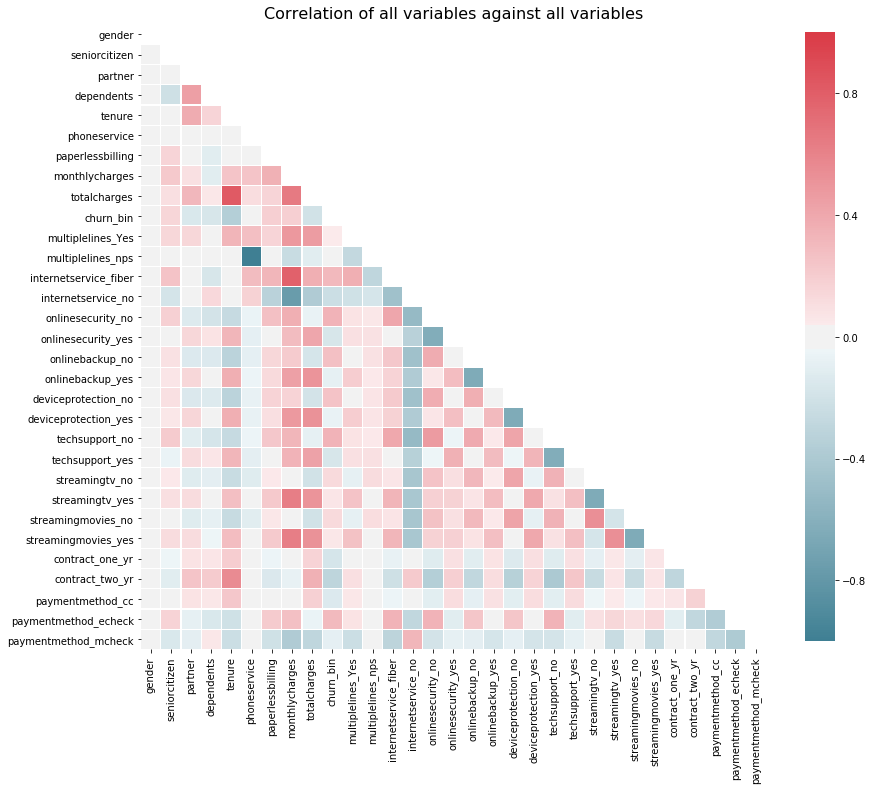

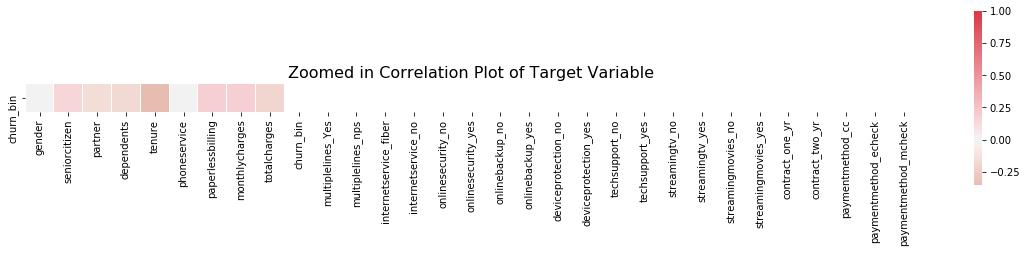

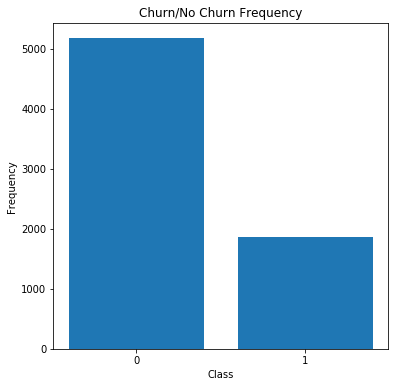

In [13]:
#telco_df2.loc[:,['page_pop', 'page_talk_bt', 'tot_avg', 'l24_avg', 'l24_48_avg', 'l48_72_avg', 'pst_len', 'pst_shre_cnt', 'comm_h_hours']].corr(method='pearson')
telcorr = telco_df2.corr(method='pearson')
mask = np.zeros_like(telcorr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(14, 14))
ax.set_title('Correlation of all variables against all variables', fontsize = 16)

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(telcorr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.1, cbar_kws={"shrink": .8})


# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 4))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(20, 10, as_cmap=True)

ax.set_title("Zoomed in Correlation Plot of Target Variable", fontsize = 16)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(telcorr[9:10], mask=mask[9:10], cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.15, cbar_kws={"shrink": .8})

unique, counts = np.unique(telco_df2.churn_bin, return_counts=True)
plt.figure(figsize = (6,6))
plt.bar(unique,counts)
plt.title('Churn/No Churn Frequency')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.xticks([0,1], unique)
plt.show()

# Telco MinMax Scaling & PCA

 - Here we are choosing to 0/1 scaling our features
 - last time we choose to normalize, this time we want to min max scale to see how it interacts with the algorithms
 - This will be important for KNN
 - PCA performed as some values are linear combination of the others i.e totalcharges are a function of tenure and monthly charges


initial train test split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = .20, shuffle = True)

scale
min_max_scale = MinMaxScaler()
telco_minmax = min_max_scale.fit(x_train)
telco_X_train = telco_minmax.transform(x_train)
telco_X_test = telco_minmax.transform(x_test)

#we want 90% of the variation
pca = PCA(n_components=.90,random_state=20190301)
telco_X_train_pca = pca.fit_transform(telco_X_train)
telco_X_test_pca = pca.transform(telco_X_test)

# Telco MinMax Scaling & PCA Telco

1. Scaling the features is important as it optimizes computation time for our algorithms.
2. After we split and scale the data we then apply Principle Components Analysis to the data.
 - We are applying PCA to our data as it accomplishes a couple of things:
  - it reduces our dimensions from 33 dimensions to 15 dimensions (36% decrease) while still retaining 90% of the variance from our original data.
  - how it performs this is by taking variables which are correlated to each other and turns them into uncorrelated variables called principle components.
  - this is important as it will take less time to fit our model while still retaining the majority of the variance from our original data.


In [316]:
full_xminmaxscaler = MinMaxScaler().fit(X)
telco_X_minmax = full_xminmaxscaler.transform(X)

full_xstdscaler = StandardScaler().fit(X)
telco_X_scale = full_xstdscaler.transform(X)

random_state = 20190301

In [317]:
pca = PCA(random_state=random_state)
telco_X_pca = pca.fit_transform(telco_X_scale)

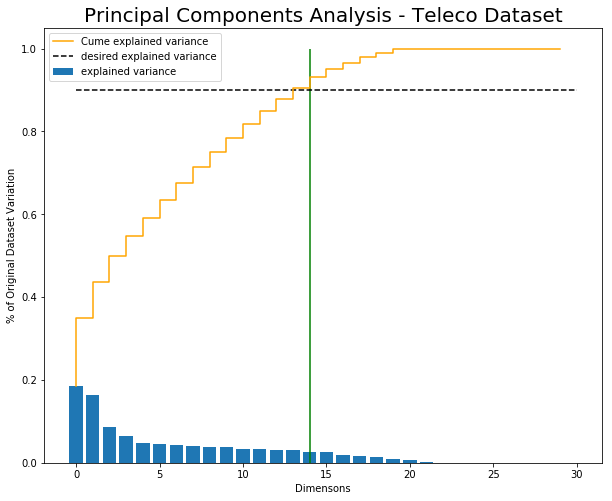

In [319]:
ratio_exp = .90
plt.figure(figsize = (10,8))
cum_var = np.cumsum(pca.explained_variance_ratio_)
plt.bar(range(0,len(pca.explained_variance_ratio_)),pca.explained_variance_ratio_, label='explained variance')
plt.step(range(0,len(pca.explained_variance_ratio_)), cum_var, label='Cume explained variance', color='orange')
plt.vlines(x = np.argmax(cum_var >= ratio_exp),ymin=0, ymax=1, color='green')
plt.hlines(y = ratio_exp,xmin = 0, xmax=30,linestyles = '--',label = 'desired explained variance')
plt.title('Principal Components Analysis - Teleco Dataset', fontsize=20)
plt.xlabel('Dimensons')
plt.ylabel('% of Original Dataset Variation')
plt.legend()

In [258]:
pca = PCA(n_components=.9,random_state=20190301)
telco_X_pca = pca.fit_transform(telco_X_scale)

#### Please note PCA plot below was used for experimenting to see how data is projected. Full comments on data projection are in the respective cluster experiments

Text(0.5,1,'Telco PCA Data points')

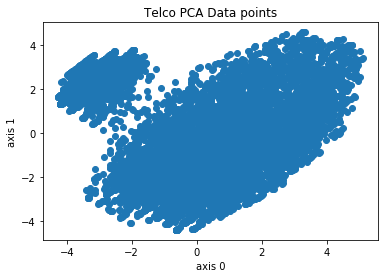

In [342]:
plt.plot(telco_X_pca[:, 0],telco_X_pca[:, 1], marker = 'o', linestyle = '')
plt.xlabel('axis 0')
plt.ylabel('axis 1')
plt.title('Telco PCA Data points')

# Telco ICA

 - Finding the correct number of components with ICA is tough. 
 - ICA is trying to parse out the underlying signals from the data, i.e maximizing independence.  
 - This is done by keeping mutual information as high as possible with original features and keeping the new features independent. 
 - In the end, we ended going with the same number of dimensions as PCA, 15. 
 - This was done to keep things similar when comparing between feature transformation techniques.
 
 #### Please note ICA plot below was used for experimenting to see how data is projected. Full comments on data projection are in the respective cluster experiments|

In [ ]:
# Compute ICA
ica = FastICA(n_components=15, random_state=random_state)
telco_X_ica = ica.fit_transform(telco_X_scale)  # Reconstruct signals
A_ = ica.mixing_  # Get estimated mixing matrix
ica.mixing_

Text(0.5,1,'Telco ICA Representation')

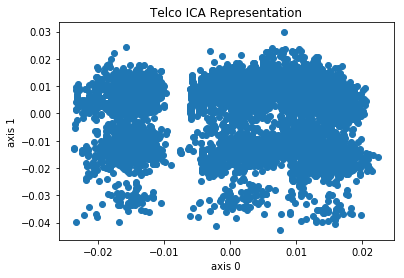

In [351]:
#plt.figure(figsize = (9,7))
#for i in list(range(0,telco_X_ica.shape[1])):
#    plt.plot(telco_X_ica[:500, i], label = f'index {i}')
#    plt.legend()
#    plt.xlabel('Index number')
#    plt.ylabel('Signals')
#    plt.title('Telco ICA Signals')

###############################################################################
# ICA Representation
plt.plot(telco_X_ica[:, 1],telco_X_ica[:, 0], marker = 'o', linestyle = '')
plt.xlabel('axis 0')
plt.ylabel('axis 1')
plt.title('Telco ICA Representation')

# Telco Random Components Analysis

 - Finding the correct number of components with random projections can be tough because it’s a bit arbitrary. 
 - Random projections are taking random directions and projecting the data onto these random directions. 
 - The benefit of this RP being able to still pick up on correlation between features. 
 - Since our lecture notes state that RP features need to be slightly higher than PCA or ICA, we went with 20 features. 
 
#### Please note RCA plot below was used for experimenting to see how data is projected. Full comments on data projection are in the respective cluster experiments

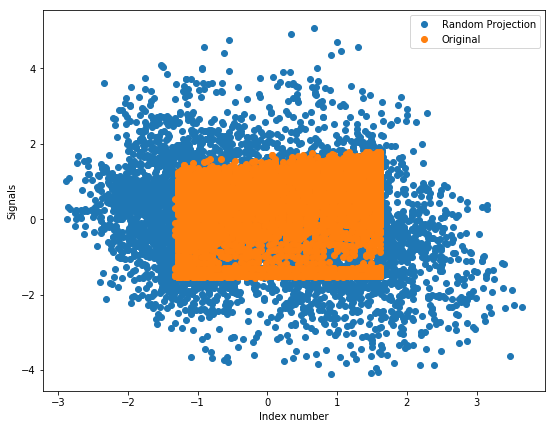

In [369]:
# Compute ICA
grp_tel = GaussianRandomProjection(n_components = 20, random_state= random_state)
telco_X_rand_proj= grp_tel.fit_transform(telco_X_scale)
telco_X_rand_proj.shape

plt.figure(figsize = (9,7))
plt.plot(telco_X_rand_proj[:, 4],telco_X_rand_proj[:,7], marker = 'o', linestyle = '', label='Random Projection')
plt.plot(telco_X_scale[:, 4],telco_X_scale[:,7], marker = 'o', linestyle = '', label='Original')
plt.xlabel('Index number')
plt.ylabel('Signals')
plt.legend()

# Telco K-Means Clustering - All Features Scaled

#### Grid Search Results

- To select our k, we performed a grid search between 1 and 15, k.
- We looked at the sum of square and plotted that against cluster number. 
- We employed first differencing as way to find the optimal cluster via “elbow” method. 
- This returned an optimal value of 6. 
- We also must be cognizant of time too but this is a quick fit, < 4 seconds, so time is not a factor. 

In [449]:
min_clust = 1
max_clust = 15
k_numbs = list(range(min_clust,max_clust))
km_param_grid = {'n_clusters': k_numbs}
ess_tel_all = []
time_tel_all = []

for i in k_numbs:
    start = time()
    kmeans_tel = KMeans(n_clusters = i,n_jobs = -1,n_init = 20,max_iter = 400)
    kmeans_tel.fit(telco_X_scale)
    end = time()
    time_diff = end-start
    time_tel_all.append(time_diff)
    ess_tel_all.append(kmeans_tel.inertia_)

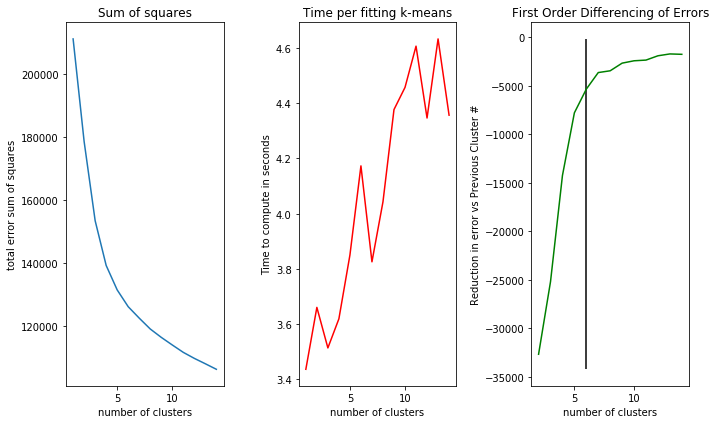

In [451]:
plot_grid_kmeans(ess_tel_all,time_tel_all,k_numbs, x_vline=6,figsize = (10,6))

## Telco Best K-Means All Features Scaled

 - These cluster are picking up a lot of the data density at the bottom and edges & top of the data space which then allows the middle cluster to grab the remaining points. 
 - The bottom two clusters appear to line up naturally, but the other clusters appear to have overlap.

In [452]:
n_clusters = 6
kmeans_tel = KMeans(n_clusters = n_clusters,n_jobs = -1,n_init = 20,max_iter = 400)
kmeans_tel.fit(telco_X_scale)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=400,
    n_clusters=6, n_init=20, n_jobs=-1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

Text(0.5,1,'Telco Dataset with 6 \n Scaled All Features')

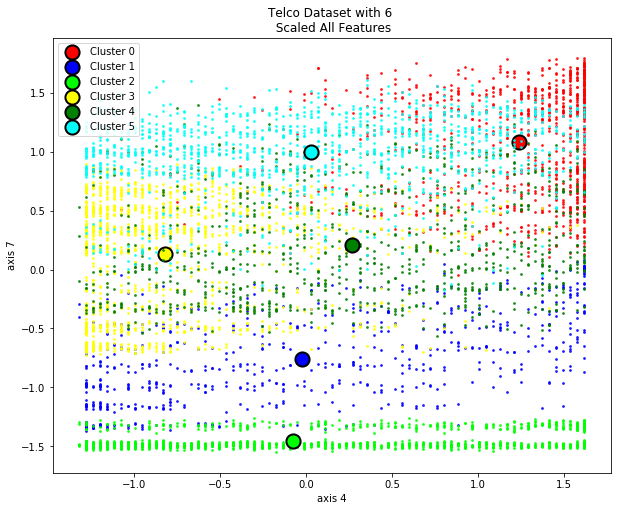

In [456]:
kmeans_cent = kmeans_tel.cluster_centers_
colors = ['#FF0000','#0000FF','#00ff00','#ffff00','#008000','#00fff9' ,'#800080','#FFA500','#16e739','#ff00f4','#FFFF00', '#000000' ,'#FFD700','#808000','#b266b2']
labels = kmeans_tel.labels_
col_map=dict(zip(set(labels),colors))
label_color = [col_map[l] for l in labels]
col1 = 4
col2 = 7


plt.figure(figsize = (10,8))
for i in range(n_clusters):
    plt.scatter(telco_X_scale[labels==i, col1],telco_X_scale[labels==i, col2],marker='.', s=30, lw=0, alpha=0.9, color = colors[i],edgecolor='k')
    plt.scatter(kmeans_cent[i, col1], kmeans_cent[i, col2], c=colors[i], marker='o',alpha=1, s=200, edgecolor='k', linewidths=2,label = f'Cluster {i}')
    plt.xlabel(f'axis {col1}')
    plt.ylabel(f'axis {col2}')
    plt.legend(loc='best')
plt.title(f'Telco Dataset with {n_clusters} \n Scaled All Features' )

### Homogenity scores

- this is used later on in the report

In [458]:
telco_homo_scores = []
telco_homo_text = []
tel_sil_score = []
kmeans_tel_scaled_labels = kmeans_tel.labels_

telco_homo_scores.append(homogeneity_score(y,kmeans_tel_scaled_labels))
tel_sil_score.append(silhouette_score(telco_X_scale, kmeans_tel.labels_, metric='euclidean'))
telco_homo_text.append('kmeans scaled')

# Telco k-Means Clustering on Feature Selection / Dimensonality Reductions

 - We used our final decision tree from homework 3 (depth of 3) to help us select our features. 
 - We choose all features which had an importance of > 0. 
 - This resulted in reducing our features from 33 to 6. 
 - We used entropy as our splitting criterion.


In [272]:
#best Decision tree
clf_dt_p = tree.DecisionTreeClassifier(max_depth=3, criterion = 'entropy')
clf_dt_p.fit(telco_X_scale,y) # only scaled so it includes all

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [274]:
telco_dec_tree_impor = pd.DataFrame(clf_dt_p.feature_importances_, index=[telco_df2[telco_df2.columns[~telco_df2.columns.isin(exclude_cols)]].columns], columns=['importance']).sort_values(by='importance', ascending=False)
telco_dec_tree_impor = telco_dec_tree_impor.reset_index().rename(columns={'level_0': 'features'}, level=0)
telco_feats = telco_dec_tree_impor[telco_dec_tree_impor.importance > 0].features.tolist()
telco_dec_tree_impor[telco_dec_tree_impor.importance > 0]

,features,importance
0,onlinesecurity_no,0.463556
1,tenure,0.205731
2,contract_two_yr,0.135433
3,internetservice_fiber,0.119637
4,contract_one_yr,0.065269
5,monthlycharges,0.010374


In [276]:
# we are finding the top features
# find rows where feat importance is greater than 0
telco_X_scale_featimp = telco_X_scale[:,clf_dt_p.feature_importances_ > 0]

## Telco Best K means Using Decision Tree for Feature Selection

#### Grid Search Results

 - To select our k, we performed a grid search between 1 and 15, k. 
 - We looked at the sum of square and plotted that against cluster number. 
 - We employed first differencing as way to find the optimal cluster via “elbow” method. 
 - This returned an optimal value of 5. 
 - We also must be cognizant of time too, but this is a quick fit as it takes 3-4 seconds to fit.

In [277]:
k_numbs = list(range(1,15))
km_param_grid = {'n_clusters': k_numbs}

In [278]:
ess_tel_untrans = []
time_tel_untrans = []

for i in k_numbs:
    start = time()
    kmeans_tel_featimp = KMeans(n_clusters = i,n_jobs = -1,n_init = 20,max_iter = 400)
    kmeans_tel_featimp.fit(telco_X_scale_featimp)
    end = time()
    time_diff = end-start
    time_tel_untrans.append(time_diff)
    ess_tel_untrans.append(kmeans_tel_featimp.inertia_)

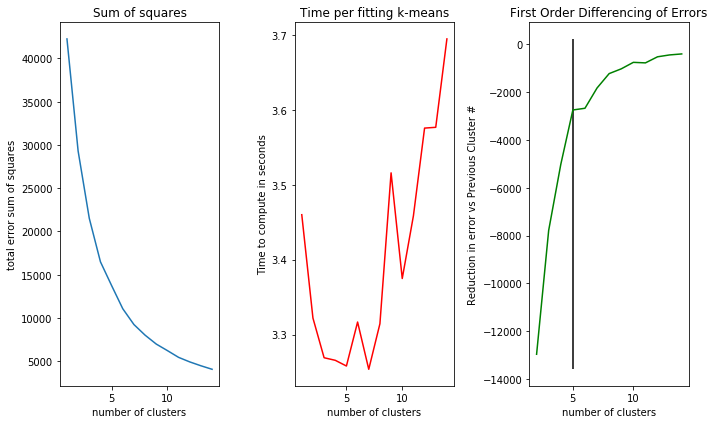

In [296]:
plot_grid_kmeans(ess_tel_untrans,time_tel_untrans,k_numbs, x_vline=5,figsize = (10,6))

## Telco Best K-Means - Feature Selection via Decision Tree
 - Looking at the clusters we got back they appear to line up naturally and seem to make sense. 
 - We have 4 cluster near the edges and there is a lot of data density towards the sides and edges of our plot then towards the middle. 
 - What the edge clusters deem as too far, the middle cluster picks up.
 - These clusters appear to have good separation between them, but we will need to look at silhouette score later to verify this.


In [421]:
# Variables
n_clusters = 5

# KMeans
kmeans_tel_fs = KMeans(n_clusters = n_clusters,n_jobs = -1,n_init = 20,max_iter = 400)
kmeans_tel_fs.fit(telco_X_scale_featimp)

# Grab the Centers and labels
kmeans_tel_fs_cent = kmeans_tel_fs.cluster_centers_

Text(0.5,1,'Telco Dataset with 5 Clusters \n Feature Importance Technique')

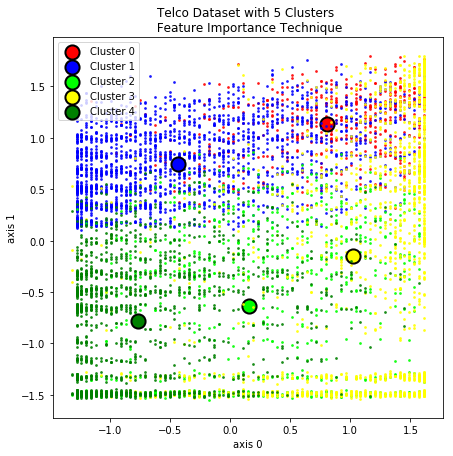

In [422]:
colors = ['#FF0000','#0000FF','#00ff00','#ffff00','#008000','#00fff9' ,'#800080','#FFA500','#16e739','#ff00f4','#FFFF00', '#000000' ,'#FFD700','#808000','#b266b2']
labels = kmeans_tel_fs.labels_
col_map=dict(zip(set(labels),colors))
label_color = [col_map[l] for l in labels]
col1 = 0
col2 = 1


plt.figure(figsize = (7,7))
for i in range(n_clusters):
    plt.scatter(telco_X_scale_featimp[labels==i, col1],telco_X_scale_featimp[labels==i, col2],marker='.', s=30, lw=0, alpha=0.9, color = colors[i],edgecolor='k')
    plt.scatter(kmeans_tel_fs_cent[i, col1], kmeans_tel_fs_cent[i, col2], c=colors[i], marker='o',alpha=1, s=200, edgecolor='k', linewidths=2,label = f'Cluster {i}')
    plt.xlabel(f'axis {col1}')
    plt.ylabel(f'axis {col2}')
    plt.legend(loc='best')

plt.title(f'Telco Dataset with {n_clusters} Clusters \n Feature Importance Technique' )

### Homogenity scores

- this is used later on in the report

In [459]:

kmeans_tel_scaled_labels = kmeans_tel_fs.labels_

telco_homo_scores.append(homogeneity_score(y,kmeans_tel_scaled_labels))
tel_sil_score.append(silhouette_score(telco_X_scale_featimp, kmeans_tel_scaled_labels, metric='euclidean'))
telco_homo_text.append('kmeans FeatImpor')

# Telco Dimensonality Reductions - PCA - K-Means

#### Grid Search Results
 - To select our k, we performed a grid search between 1 and 15, k. 
 - We looked at the sum of square and plotted that against cluster number. 
 - We employed first differencing as way to find the optimal cluster via “elbow” method. 
 - This returned an optimal value of 7. 
 - We also must be cognizant of time too. Time to compute is not an issue here as it takes 3-4 seconds to fit. 


In [291]:
k_numbs = list(range(1,15))
km_param_grid = {'n_clusters': k_numbs}

In [292]:
ess_tel_pca = []
time_tel_pca = []

for i in k_numbs:
    start = time()
    kmeans_tel_pca = KMeans(n_clusters = i,n_jobs = -1,n_init = 20,max_iter = 400)
    kmeans_tel_pca.fit(telco_X_pca)
    end = time()
    time_diff = end-start
    time_tel_pca.append(time_diff)
    ess_tel_pca.append(kmeans_tel_pca.inertia_)

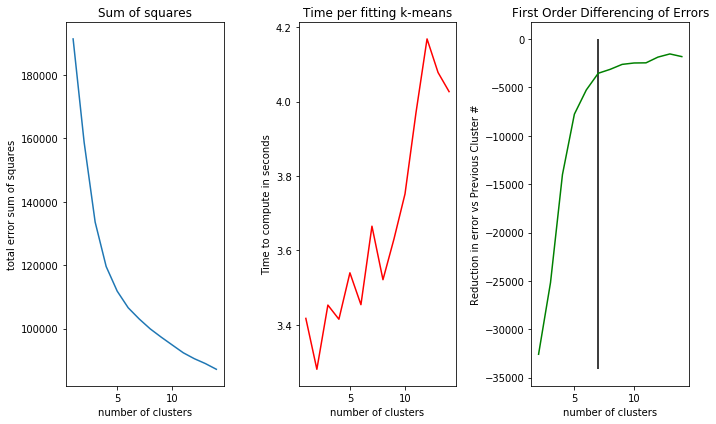

In [298]:
plot_grid_kmeans(ess_tel_pca,time_tel_pca,k_numbs, x_vline=7,figsize = (10,6))

## Telco Best K-Means - PCA
 - We are getting clusters that appear to be defining a box and an outlier. 
 - This is very different than what we saw in 1 & 2 but makes sense as it’s taking the data and forcing it to be mutually orthogonal.
 - This in turn projects our data into this box looking shape. 
 - 4 clusters have the edges of the box and 2 other clusters on opposite sides of the box. 
 - The other outlier cluster is its own cluster. This appears to be a very good cluster. 
 - There is some overlap between the clusters, except for the outlier in the bottom right which doesn’t have any overlap. 


In [424]:
# Variables
n_clusters = 7

# KMeans
kmeans_tel_pca_best = KMeans(n_clusters = n_clusters,n_jobs = -1,n_init = 20,max_iter = 400)
kmeans_tel_pca_best.fit(telco_X_pca)

# Grab the Centers and labels
kmeans_tel_pca_cent = kmeans_tel_pca_best.cluster_centers_

Text(0.5,1,'Telco Dataset with 7 PCA Transformed dataset')

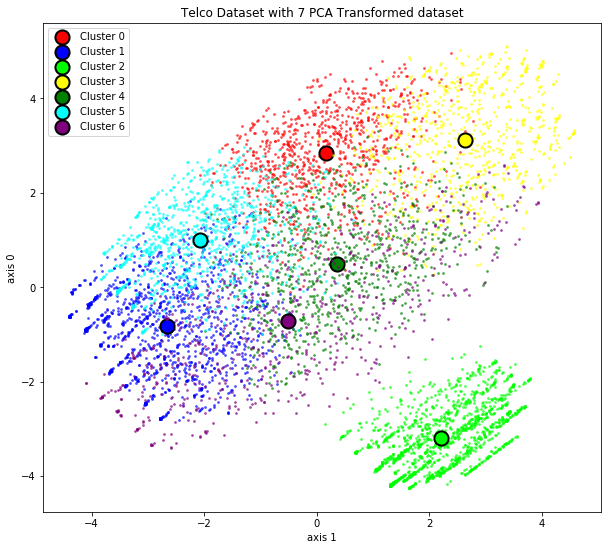

In [320]:
colors = ['#FF0000','#0000FF','#00ff00','#ffff00','#008000','#00fff9' ,'#800080','#FFA500','#16e739','#ff00f4','#FFFF00', '#000000' ,'#FFD700','#808000','#b266b2']
labels = kmeans_tel_pca_best.labels_
col_map=dict(zip(set(labels),colors))
label_color = [col_map[l] for l in labels]
col1 = 1
col2 = 0


plt.figure(figsize = (10,9))
for i in range(n_clusters):
    plt.scatter(telco_X_pca[labels==i, col1],telco_X_pca[labels==i, col2],marker='.', s=30, lw=0, alpha=0.7, color = colors[i],edgecolor='k')
    plt.scatter(kmeans_tel_pca_cent[i, col1], kmeans_tel_pca_cent[i, col2], c=colors[i], marker='o',alpha=1, s=200, edgecolor='k', linewidths=2, label = f'Cluster {i}')
    plt.xlabel(f'axis {col1}')
    plt.ylabel(f'axis {col2}')
    plt.legend(loc='best')

plt.title(f'Telco Dataset with {n_clusters} PCA Transformed dataset' )

### Homogenity scores

- this is used later on in the report

In [460]:
kmeans_tel_pca_labels = kmeans_tel_pca_best.labels_

# homogenity Score
telco_homo_scores.append(homogeneity_score(y,kmeans_tel_pca_labels))

# add in dataset and labels
tel_sil_score.append(silhouette_score(telco_X_pca, kmeans_tel_pca_labels, metric='euclidean'))
telco_homo_text.append('kmeans PCA')

# Telco Dimensonality Reductions - ICA - K-Means

#### Grid Search Results

 - To select our k, we performed a grid search between 1 and 40, k. 
 - We looked at the sum of square and plotted that against cluster number. 
 - We employed first differencing as way to find the optimal cluster via “elbow” method. 
 - This returned an optimal value of 14. We also must be cognizant of time too as computation time increases with # of clusters.
 - Time to compute is not an issue here as it takes 3-6 seconds to fit with our solution taking 4 seconds to fit. 

In [327]:
max_clus = 40
min_clus = 1
k_numbs = list(range(min_clus,max_clus))
km_param_grid = {'n_clusters': k_numbs}

In [328]:
ess_tel_ica = []
time_tel_ica = []

for i in k_numbs:
    start = time()
    kmeans_tel_ica = KMeans(n_clusters = i,n_jobs = -1,n_init = 20,max_iter = 400)
    kmeans_tel_ica.fit(telco_X_ica)
    end = time()
    time_diff = end-start
    time_tel_ica.append(time_diff)
    ess_tel_ica.append(kmeans_tel_ica.inertia_)

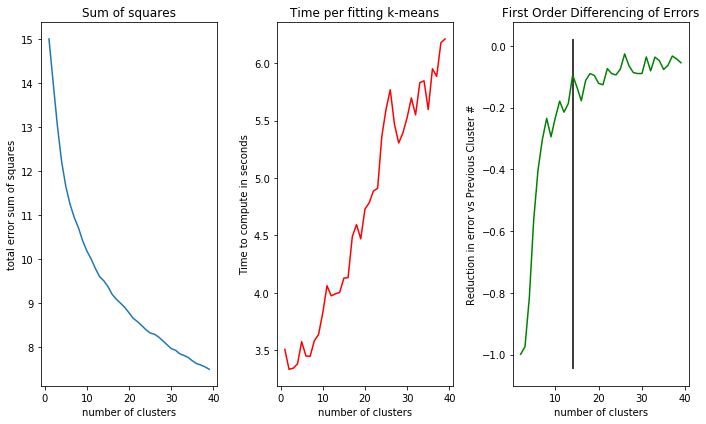

In [331]:
plot_grid_kmeans(ess_tel_ica,time_tel_ica,k_numbs, x_vline=14,figsize = (10,6))

## Telco Best K-Means - ICA
 - Since ICA is about independence, we can see how this projects our data into rather distinct clusters. 
 - ICA has taken out data and given us 3 different “levels” of data points within each data point we see 3 groupings.
 - We would want/expect our clusters to pick up these groupings. The downside, these algorithms, at times, have a hard time finding these clusters and can get stuck. 
 - When this happens, it sticks multiple groups together when it should be its own group.  
 - We are seeing this in our clusters as multiple clusters are being stuck together and others cluster being stuck on top of each other. 
   - In order to combat this, we employed 30 random restarts to help with this, but we are still getting sub-optimal clustering


In [426]:
# Variables
n_clusters = 14

# KMeans
kmeans_tel_ica_best = KMeans(n_clusters = n_clusters,n_jobs = -1,n_init = 30,max_iter = 400)
kmeans_tel_ica_best.fit(telco_X_ica)

# Grab the Centers and labels
kmeans_tel_ica_cent = kmeans_tel_ica_best.cluster_centers_

Text(0.5,1,'Telco Dataset with 14 ICA Transformed dataset')

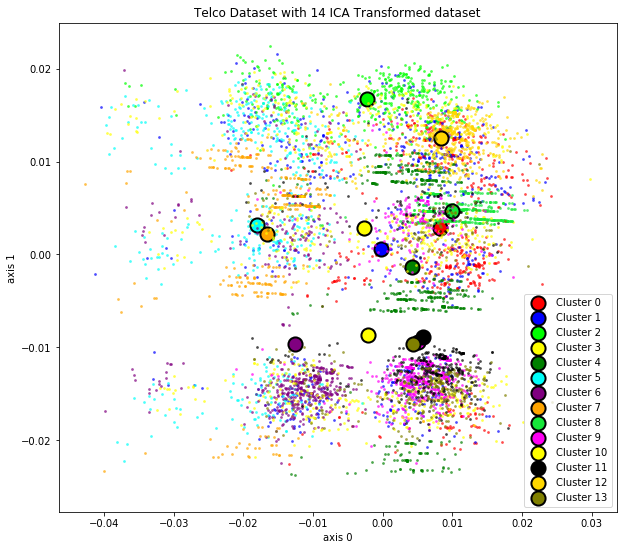

In [386]:
colors = ['#FF0000','#0000FF','#00ff00','#ffff00','#008000','#00fff9' ,'#800080','#FFA500','#16e739','#ff00f4','#FFFF00', '#000000' ,'#FFD700','#808000','#b266b2']
labels = kmeans_tel_ica_best.labels_
col_map=dict(zip(set(labels),colors))
label_color = [col_map[l] for l in labels]
col1 = 0
col2 = 1


plt.figure(figsize = (10,9))
for i in range(n_clusters):
    plt.scatter(telco_X_ica[labels==i, col1],telco_X_ica[labels==i, col2],marker='.', s=30, lw=0, alpha=0.7, color = colors[i],edgecolor='k')
    plt.scatter(kmeans_tel_ica_cent[i, col1], kmeans_tel_ica_cent[i, col2], c=colors[i], marker='o',alpha=1, s=200, edgecolor='k', linewidths=2, label = f'Cluster {i}')
    plt.xlabel(f'axis {col1}')
    plt.ylabel(f'axis {col2}')
    plt.legend(loc='best')

plt.title(f'Telco Dataset with {n_clusters} ICA Transformed dataset' )

### Homogenity scores

- this is used later on in the report

In [461]:
kmeans_tel_ica_labels = kmeans_tel_ica_best.labels_

# homo scores
telco_homo_scores.append(homogeneity_score(y,kmeans_tel_ica_labels))

# Add in sil score
tel_sil_score.append(silhouette_score(telco_X_ica, kmeans_tel_ica_labels, metric='euclidean'))
telco_homo_text.append('kmeans ICA')

# Telco Dimensonality Reduction - RPA - K-Means

#### Grid Search Results
 - To select our k, we performed a grid search between 1 and 30, k. 
 - We looked at the sum of square and plotted that against cluster number. 
 - We employed first differencing as way to find the optimal cluster via “elbow” method. 
 - This elbow is around 7 so we are choosing an optimal cluster of 7. 
 - We also must be cognizant of time as computation time increases with # of clusters. 
 - Time to compute is not an issue here as it takes 3-5 seconds to fit with our solution taking 4 seconds to fit.


In [380]:
max_clus = 30
min_clus = 1
k_numbs = list(range(min_clus,max_clus))
km_param_grid = {'n_clusters': k_numbs}

In [381]:
ess_tel_rpa = []
time_tel_rpa = []

for i in k_numbs:
    start = time()
    kmeans_tel_rpa = KMeans(n_clusters = i,n_jobs = -1,n_init = 20,max_iter = 400)
    kmeans_tel_rpa.fit(telco_X_rand_proj)
    end = time()
    time_diff = end-start
    time_tel_rpa.append(time_diff)
    ess_tel_rpa.append(kmeans_tel_rpa.inertia_)

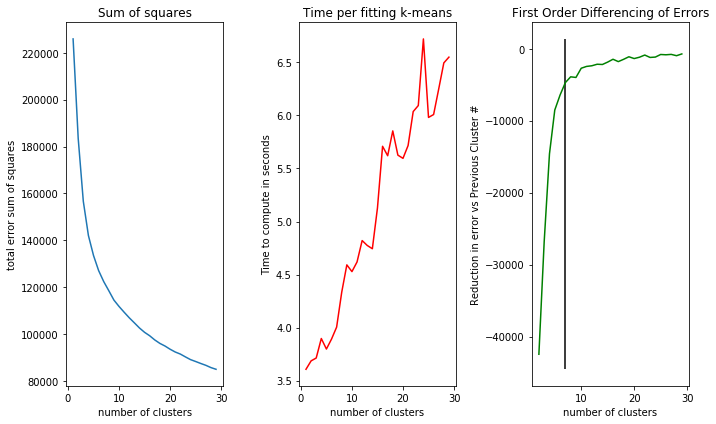

In [382]:
plot_grid_kmeans(ess_tel_rpa,time_tel_rpa,k_numbs, x_vline=7,figsize = (10,6))

## Telco Best K-Means - RPA
 - The clusters we are returning appear to be very gaussian. 
 - One can almost see the multivariate distribution of the blue cluster. 
 - This shouldn’t surprise us as the underlying package we used is putting it in a gaussian space. 
 - The 7 clusters which we deemed as optimal by the elbow method show data points in clusters overlapping each other and clusters being bunched up with each other. 
 - The results we are seeing are somewhat close to ICA but not to the extreme of ICA. We can see how some of the correlation of the features are picked up by RP and projected onto the new space. This is evident by Cluster 1(blue) which sees data points in a somewhat straight line but having some distance between them.


In [428]:
# Variables
n_clusters = 7

# KMeans
kmeans_tel_rpa_best = KMeans(n_clusters = n_clusters,n_jobs = -1,n_init = 20,max_iter = 400)
kmeans_tel_rpa_best.fit(telco_X_rand_proj)

# Grab the Centers and labels
kmeans_tel_rpa_cent = kmeans_tel_rpa_best.cluster_centers_

Text(0.5,1,'Telco Dataset with 7 Clusters \n Random Projections')

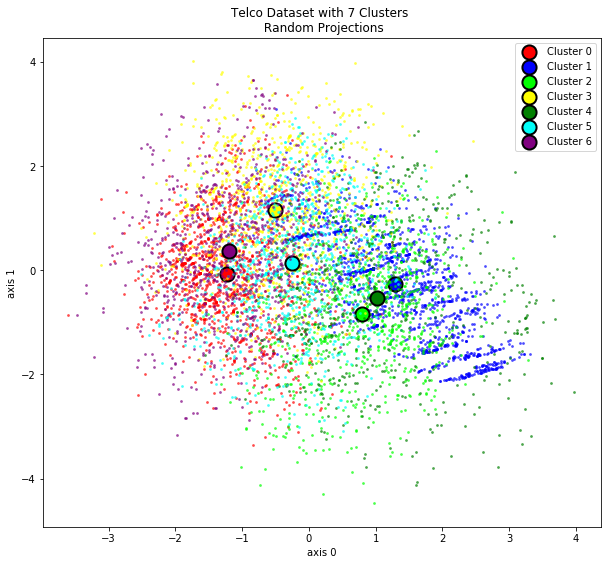

In [379]:
colors = ['#FF0000','#0000FF','#00ff00','#ffff00','#008000','#00fff9' ,'#800080','#FFA500','#16e739','#ff00f4','#FFFF00', '#000000' ,'#FFD700','#808000','#b266b2']
labels = kmeans_tel_rpa_best.labels_
col_map=dict(zip(set(labels),colors))
label_color = [col_map[l] for l in labels]
col1 = 0
col2 = 1


plt.figure(figsize = (10,9))
for i in range(n_clusters):
    plt.scatter(telco_X_rand_proj[labels==i, col1],telco_X_rand_proj[labels==i, col2],marker='.', s=30, lw=0, alpha=0.7, color = colors[i],edgecolor='k')
    plt.scatter(kmeans_tel_rpa_cent[i, col1], kmeans_tel_rpa_cent[i, col2], c=colors[i], marker='o',alpha=1, s=200, edgecolor='k', linewidths=2, label = f'Cluster {i}')
    plt.xlabel(f'axis {col1}')
    plt.ylabel(f'axis {col2}')
    plt.legend(loc='best')

plt.title(f'Telco Dataset with {n_clusters} Clusters \n Random Projections' )

### Homogenity scores

- this is used later on in the report

In [462]:
kmeans_tel_rpa_labels = kmeans_tel_rpa_best.labels_
telco_homo_scores.append(homogeneity_score(y,kmeans_tel_rpa_labels))

# Add in sil score
tel_sil_score.append(silhouette_score(telco_X_rand_proj, kmeans_tel_rpa_labels, metric='euclidean'))

telco_homo_text.append('kmeans RCA')

## Comparing and Contrasting K-Means
 - When we compare chart 1b, 2b, 3b, 4b , & 5b the difference between Feature selection, PCA, ICA and RP begin to come to light. 
 - 1b(all scaled features), 2b(feature selection) & 3b(PCA ) all appear to cluster our data very well. 
 - It’s finding the data densities and centering based on those densities. 4b(ICA) & 5b(RCA) don’t appear to be performing that well. 
 - ICA is having trouble finding the groupings of data is generalizing more towards the middle of our space. 
 - While RCA, appears to be find the random gaussians underneath but clusters appear to be overlapping each other and don’t appear to be separated that well. 
 - This could be due to only plotting in two dimensions. We will withhold judgement until we see silhouette scores. 
 - We see that across different transformations we are getting different clusters and cluster numbers, except for 1b & 2b which are similar. 
 - This shouldn’t surprise us given our data is in the same space just with a few less features.
 - The other feature transformation being performed are giving different clusters as it’s putting our data in a different feature projection space.

# Telco Expectation Maximization - Start

# Telco Expectation Maximization - Start

# Telco Expec Max on all Features 

#### Grid Search Results
 - To select our k in expectation maximization we performed a grid search between 1 and 15 k and over 4 different types of covariances spherical, tied, diagonal and full. 
 - We looked at the AIC & BIC values of each covariance type and plotted against cluster number. 
 - We are looking for the “elbow” with the lowest AIC/BIC score. 
 - This returned an optimal value of 5. 
 - We also must be cognizant of time, too. This this is quick as it takes around 1 second for fitting. 


In [597]:
n_components_range = range(1, 15)
cv_types = ['spherical', 'tied', 'diag', 'full']
aic_tel_all, bic_tel_all, gmm, time_tel_all = gmm_models(telco_X_scale, cv_types=cv_types, n_components = n_components_range)

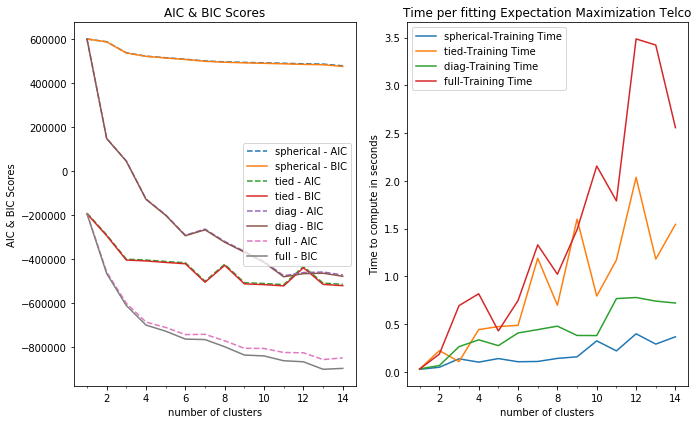

In [598]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols=2, figsize= (10,6))
for i, cv_type in enumerate(cv_types):
    ax1.plot(list(n_components_range),bic_tel_all[i*len(n_components_range):(i+1)*len(n_components_range)],
             linestyle = '--', label = f'{cv_type} - AIC')
    ax1.plot(list(n_components_range),aic_tel_all[i*len(n_components_range):(i+1)*len(n_components_range)],
             label = f'{cv_type} - BIC')
    ax1.legend(loc='best')
    ax1.set_title('AIC & BIC Scores')
    ax1.set_ylabel('AIC & BIC Scores')
    ax1.set_xlabel('number of clusters')
    ax1.set_xticks(list(n_components_range), minor=True)
    ax2.plot(list(n_components_range),time_tel_all[i*len(n_components_range):(i+1)*len(n_components_range)],
             label = f'{cv_type}-Training Time')
    ax2.set_xlabel('number of clusters')
    ax2.set_ylabel('Time to compute in seconds')
    ax2.set_xticks(list(n_components_range), minor=True)
    ax2.set_title('Time per fitting Expectation Maximization Telco')
    ax2.legend()
fig.tight_layout()

## Telco Best Expectation-Maximization Full Dataset

 - Looking at the types clusters we got back, we see there is a lot of data points towards the edges of the chart. 
 - The Blue, Green and Yellow clusters and picking up on it and are clustering accordingly. 
 - The remaining two clusters are picking up the data more towards the middle. 
 - We got these clusters mainly by the data densities towards the outer edges of our data space. 
 - These results are very similar to what we saw in 1a of k-means. 

In [430]:
n_clusters = 5
gmm_best = GaussianMixture(n_components=n_clusters,
                                      covariance_type='full',n_init=20)
gmm_tel_fulllabels = gmm_best.fit(telco_X_scale).predict(telco_X_scale)
means = gmm_best.means_

Text(0.5,1,'Telco Dataset with 5 \n Feature Selection Expec Max')

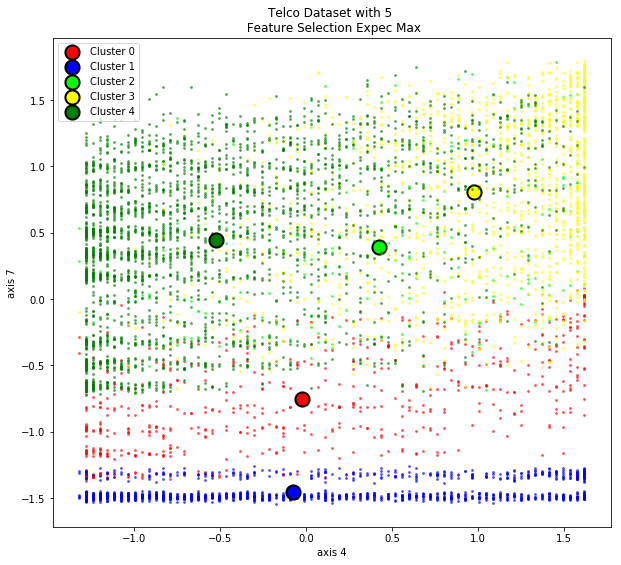

In [391]:
colors = ['#FF0000','#0000FF','#00ff00','#ffff00','#008000','#00fff9' ,'#800080','#FFA500','#16e739','#ff00f4','#FFFF00', '#000000' ,'#FFD700','#808000','#b266b2']
col_map=dict(zip(set(gmm_tel_fulllabels),colors))
label_color = [col_map[l] for l in gmm_tel_fulllabels]
col1 = 4
col2 = 7

plt.figure(figsize = (10,9))
for i in range(n_clusters):
    plt.scatter(telco_X_scale[gmm_tel_fulllabels==i, col1],telco_X_scale[gmm_tel_fulllabels==i, col2],marker='.', s=30, lw=0, alpha=0.7, color = colors[i],edgecolor='k')
    plt.scatter(means[i, col1], means[i, col2], c=colors[i], marker='o',alpha=1, s=200, edgecolor='k', linewidths=2, label = f'Cluster {i}')
    plt.xlabel(f'axis {col1}')
    plt.ylabel(f'axis {col2}')
    plt.legend(loc='best')


plt.title(f'Telco Dataset with {n_clusters} \n Scaled Expec Max' )

### Homogenity scores

- this is used later on in the report

In [463]:
telco_homo_scores.append(homogeneity_score(y,gmm_tel_fulllabels))

# Add in sil score
tel_sil_score.append(silhouette_score(telco_X_scale, gmm_tel_fulllabels, metric='euclidean'))
telco_homo_text.append('ExecMax Scale')

# Telco Expectation Maximization - Feat Selection

#### Grid Search Results

- To select our k in expectation maximization we performed a grid search between 1 and 15 k and over 4 different types of covariances spherical, tied, diagonal and full.
- We looked at the AIC & BIC values of each covariance type and plotted against cluster number. 
- We are looking for the “elbow” with the lowest AIC/BIC score. 
- This returned an optimal value of 5 with either full or diagonal covariance. 
- In order to keep things consistent with K-means we are choosing 5 clusters and using full covariance as full covariance allows each cluster it’s own general covar matrix. 
- There isn’t a difference in time between them so we will use the more robust covariance matrix.

In [599]:
n_components_range = range(1, 15)
cv_types = ['spherical', 'tied', 'diag', 'full']
aic_tel_featimp, bic_tel_featimp, gmm_tel_featimp,time_tel_featimp = gmm_models(telco_X_scale_featimp, cv_types=cv_types, n_components = n_components_range)

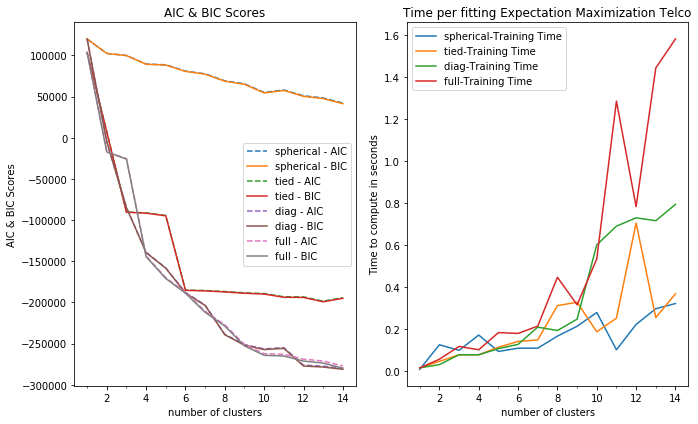

In [600]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols=2, figsize= (10,6))
for i, cv_type in enumerate(cv_types):
    ax1.plot(list(n_components_range),bic_tel_featimp[i*len(n_components_range):(i+1)*len(n_components_range)],
             linestyle = '--', label = f'{cv_type} - AIC')
    ax1.plot(list(n_components_range),aic_tel_featimp[i*len(n_components_range):(i+1)*len(n_components_range)],
             label = f'{cv_type} - BIC')
    ax1.legend(loc='best')
    ax1.set_title('AIC & BIC Scores')
    ax1.set_ylabel('AIC & BIC Scores')
    ax1.set_xlabel('number of clusters')
    ax1.set_xticks(list(n_components_range), minor=True)
    ax2.plot(list(n_components_range),time_tel_featimp[i*len(n_components_range):(i+1)*len(n_components_range)],
             label = f'{cv_type}-Training Time')
    ax2.set_xlabel('number of clusters')
    ax2.set_ylabel('Time to compute in seconds')
    ax2.set_xticks(list(n_components_range), minor=True)
    ax2.set_title('Time per fitting Expectation Maximization Telco')
    ax2.legend()
fig.tight_layout()

## Telco Best Expec-Max from Feature Selection
 - The types of clusters returned are very similar to what K-means returned. 
 - Clusters are more towards the edges of the plot due to the data densities being the highest there. 
 - The biggest difference is cluster 4(dark green) which is more toward the left edge whereas k-means had this more towards the middle. 
 - I think we got the cluster we did because the edges have more data density than the center, so, expectation maximization is having a larger pull towards the edges than K-means. 

In [432]:
n_clusters = 5
gmm_best_featimp = GaussianMixture(n_components=n_clusters,
                                      covariance_type='full', n_init= 10)
gmm_best_featimp_labels = gmm_best_featimp.fit(telco_X_scale_featimp).predict(telco_X_scale_featimp)
means = gmm_best_featimp.means_

Text(0.5,1,'Telco Dataset with 5 \n Feature Importance')

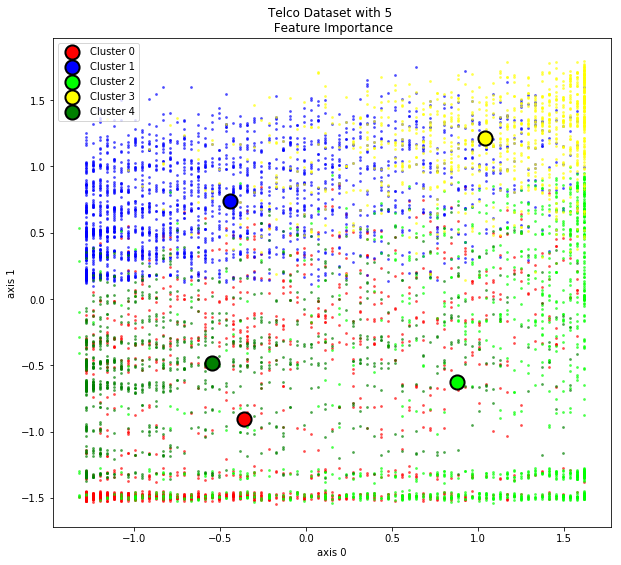

In [399]:
colors = ['#FF0000','#0000FF','#00ff00','#ffff00','#008000','#00fff9' ,'#800080','#FFA500','#16e739','#ff00f4','#FFFF00', '#000000' ,'#FFD700','#808000','#b266b2']
col_map=dict(zip(set(gmm_best_featimp_labels),colors))
label_color = [col_map[l] for l in gmm_best_featimp_labels]
col1 = 0
col2 = 1

plt.figure(figsize = (10,9))
for i in range(n_clusters):
    plt.scatter(telco_X_scale_featimp[gmm_best_featimp_labels==i, col1],telco_X_scale_featimp[gmm_best_featimp_labels==i, col2],marker='.', s=30, lw=0, alpha=0.7, color = colors[i],edgecolor='k')
    plt.scatter(means[i, col1], means[i, col2], c=colors[i], marker='o',alpha=1, s=200, edgecolor='k', linewidths=2, label = f'Cluster {i}')
    plt.xlabel(f'axis {col1}')
    plt.ylabel(f'axis {col2}')
    plt.legend(loc='best')

plt.title(f'Telco Dataset with {n_clusters} \n Feature Importance' )

### Homogenity scores

- this is used later on in the report

In [464]:
telco_homo_scores.append(homogeneity_score(y,gmm_best_featimp_labels))
# Add in sil score
tel_sil_score.append(silhouette_score(telco_X_scale_featimp, gmm_best_featimp_labels, metric='euclidean'))
telco_homo_text.append('ExecMax FeatImpor')

# Telco Expectation-Maximization PCA
#### Grid Search Results

 - To select our k in expectation maximization we performed a grid search between 1 and 15 k and over 4 different types of covariances spherical, tied, diagonal and full. 
 - We looked at the AIC & BIC values of each covariance type against plotted against cluster number. 
 - Again, we are looking for the “elbow” with the lowest AIC/BIC score. 
 - This returned an optimal value of 4 with full covariance. 
 - Full Covariance with 4 clusters does take a couple of seconds longer than others but the improvement in AIC/BIC is worth it. 

In [400]:
n_components_range = range(1, 15)
cv_types = ['spherical', 'tied', 'diag', 'full']
aic_tel_pca, bic_tel_pca, gmm_tel_pca, time_tel_pca = gmm_models(telco_X_pca, cv_types=cv_types, n_components = n_components_range)

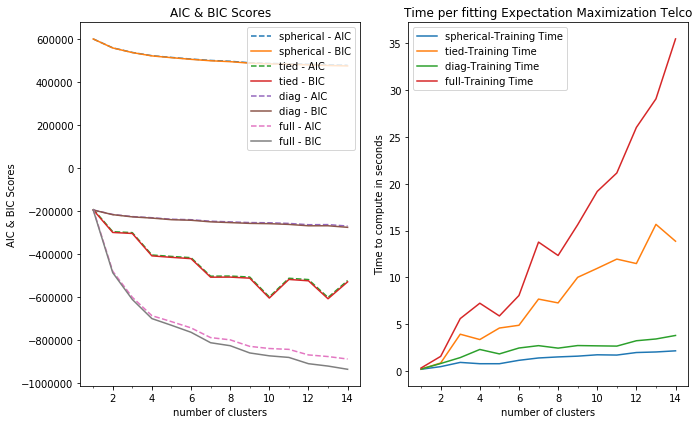

In [402]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols=2, figsize= (10,6))
for i, cv_type in enumerate(cv_types):
    ax1.plot(list(n_components_range),bic_tel_pca[i*len(n_components_range):(i+1)*len(n_components_range)],
             linestyle = '--', label = f'{cv_type} - AIC')
    ax1.plot(list(n_components_range),aic_tel_pca[i*len(n_components_range):(i+1)*len(n_components_range)],
             label = f'{cv_type} - BIC')
    ax1.legend(loc='best')
    ax1.set_title('AIC & BIC Scores')
    ax1.set_xlabel('number of clusters')
    ax1.set_ylabel('AIC & BIC Scores')
    ax1.set_xticks(list(n_components_range), minor=True)
    ax2.plot(list(n_components_range),time_tel_pca[i*len(n_components_range):(i+1)*len(n_components_range)],
             label = f'{cv_type}-Training Time')
    ax2.set_xlabel('number of clusters')
    ax2.set_ylabel('Time to compute in seconds')
    ax2.set_xticks(list(n_components_range), minor=True)
    ax2.set_title('Time per fitting Expectation Maximization Telco')
    ax2.legend()
fig.tight_layout()

## Telco Best Expec-Max from PCA
 - The types of clusters are what we would expect from PCA driven by the underlying assumptions of PCA. 
 - PCA is forcing our data to be mutually orthogonal. 
 - We can see this in the box looking shape and the outlying cluster in the bottom. 
 - There appears to be these right angles in the box. Expectation Max and K-means are both picking up on the bottom right cluster. 
 - The difference here is the three clusters in our box. 
 - Expec max is assigning the bottom of the box to cluster 3(yellow) and the top and sides to cluster 0 and 1. 
 - The cluster centers appear to have some good space between them but some of the cluster points appear to overlap except the outlier in the bottom right

In [434]:
n_clusters = 4
gmm_best_pca = GaussianMixture(n_components=n_clusters,
                                      covariance_type='full', n_init = 10)
gmm_best_pca_labels = gmm_best_pca.fit(telco_X_pca).predict(telco_X_pca)
means = gmm_best_pca.means_

Text(0.5,1,'Telco Dataset with 4 Clusters \n Expectation Max PCA')

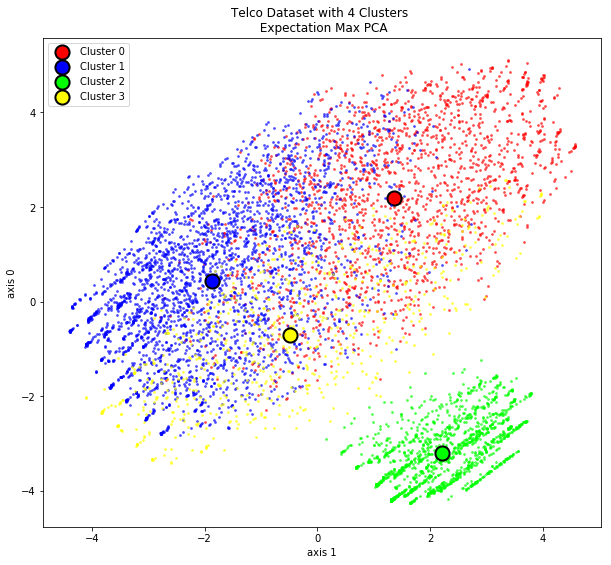

In [405]:
colors = ['#FF0000','#0000FF','#00ff00','#ffff00','#008000','#00fff9' ,'#800080','#FFA500','#16e739','#ff00f4','#FFFF00', '#000000' ,'#FFD700','#808000','#b266b2']
col_map=dict(zip(set(gmm_best_pca_labels),colors))
label_color = [col_map[l] for l in gmm_best_pca_labels]
col1 = 1
col2 = 0

plt.figure(figsize = (10,9))
for i in range(n_clusters):
    plt.scatter(telco_X_pca[gmm_best_pca_labels==i, col1],telco_X_pca[gmm_best_pca_labels==i, col2],marker='.', s=30, lw=0, alpha=0.7, color = colors[i],edgecolor='k')
    plt.scatter(means[i, col1], means[i, col2], c=colors[i], marker='o',alpha=1, s=200, edgecolor='k', linewidths=2, label = f'Cluster {i}')
    plt.xlabel(f'axis {col1}')
    plt.ylabel(f'axis {col2}')
    plt.legend(loc='best')

plt.title(f'Telco Dataset with {n_clusters} Clusters \n Expectation Max PCA' )

### Homogenity scores

- this is used later on in the report

In [465]:
telco_homo_scores.append(homogeneity_score(y,gmm_best_pca_labels))
# Add in sil score
tel_sil_score.append(silhouette_score(telco_X_pca, gmm_best_pca_labels, metric='euclidean'))
telco_homo_text.append('ExecMax PCA')

# Telco Expectation-Maximization ICA

#### Grid Search Results

 - To select our k in expectation maximization we performed a grid search between 1 and 15 k and over 4 different types of covariances spherical, tied, diagonal and full. 
 - We looked at the AIC & BIC values of each covariance type against plotted against cluster number. 
 - Again, we are looking for the “elbow” with the lowest AIC/BIC score.
 - This returned an optimal value of 6 with full covariance. 
 - Full Covariance with 6 clusters takes roughly the same amount of time to compute vs other covariance matrix. 

In [406]:
n_components_range = range(1, 15)
cv_types = ['spherical', 'tied', 'diag', 'full']
aic_tel_ica, bic_tel_ica, gmm_tel_ica, time_tel_ica = gmm_models(telco_X_ica, cv_types=cv_types, n_components = n_components_range)

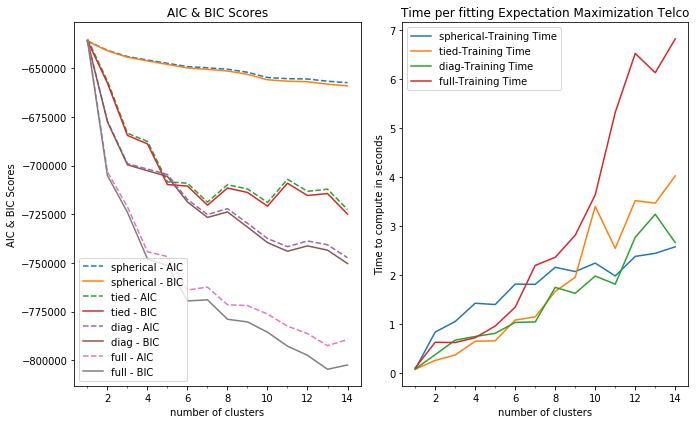

In [407]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols=2, figsize= (10,6))
for i, cv_type in enumerate(cv_types):
    ax1.plot(list(n_components_range),bic_tel_ica[i*len(n_components_range):(i+1)*len(n_components_range)],
             linestyle = '--', label = f'{cv_type} - AIC')
    ax1.plot(list(n_components_range),aic_tel_ica[i*len(n_components_range):(i+1)*len(n_components_range)],
             label = f'{cv_type} - BIC')
    ax1.legend(loc='best')
    ax1.set_title('AIC & BIC Scores')
    ax1.set_xlabel('number of clusters')
    ax1.set_ylabel('AIC & BIC Scores')
    ax1.set_xticks(list(n_components_range), minor=True)
    ax2.plot(list(n_components_range),time_tel_ica[i*len(n_components_range):(i+1)*len(n_components_range)],
             label = f'{cv_type}-Training Time')
    ax2.set_xlabel('number of clusters')
    ax2.set_ylabel('Time to compute in seconds')
    ax2.set_xticks(list(n_components_range), minor=True)
    ax2.set_title('Time per fitting Expectation Maximization Telco')
    ax2.legend()
fig.tight_layout()

## Telco Best Expec-Max from ICA

 -  Since ICA is about independence between features, we can see this in our data projection. 
 - We can see these groups of data that look like they want to be their own clusters. 
 - Given that ICA is about independence between features, it’s no surprise why our data is projected this way.
 - We would want/expect our clusters to pick up these groupings.  
 - The downside, these algorithms, at times, have a hard time finding these clusters and can get stuck. 
 - It then sticks multiple groups together when it should be its own group.
 - We are seeing this in our clusters as multiple clusters are being stuck together.
 - Given the spread of our data projection our cluster centers are all getting stuck in the middle and near each other. 
 - In this situation, we are seeing expectation maximization and k-means perform similar. They both are getting stuck. 
 - We employed 10 random restarts to help the algorithm get “unstuck”, but we are still getting sub-optimal clustering. 

In [436]:
n_clusters = 6
gmm_best_ica = GaussianMixture(n_components=n_clusters,
                                      covariance_type='full',n_init=10)
gmm_best_ica_labels = gmm_best_ica.fit(telco_X_ica).predict(telco_X_ica)
means = gmm_best_ica.means_

Text(0.5,1,'Telco Dataset with 6 Clusters \n ICA Transformation')

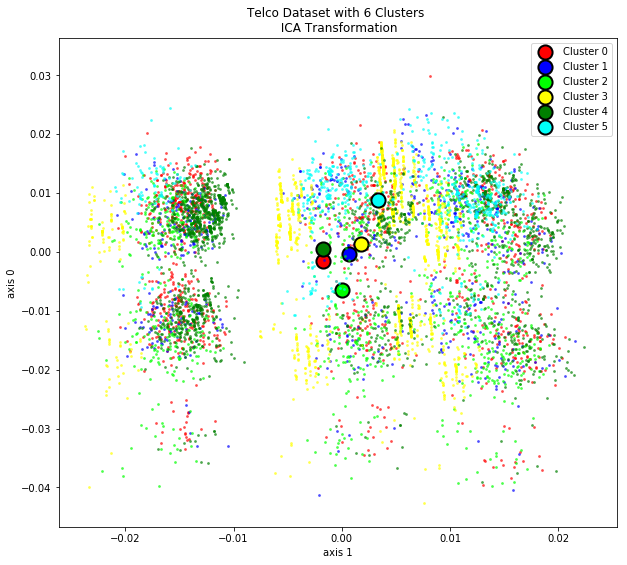

In [409]:
colors = ['#FF0000','#0000FF','#00ff00','#ffff00','#008000','#00fff9' ,'#800080','#FFA500','#16e739','#ff00f4','#FFFF00', '#000000' ,'#FFD700','#808000','#b266b2']
col_map=dict(zip(set(gmm_best_ica_labels),colors))
label_color = [col_map[l] for l in gmm_best_ica_labels]
col1 = 1
col2 = 0

plt.figure(figsize = (10,9))
for i in range(n_clusters):
    plt.scatter(telco_X_ica[gmm_best_ica_labels==i, col1],telco_X_ica[gmm_best_ica_labels==i, col2],marker='.', s=30, lw=0, alpha=0.7, color = colors[i],edgecolor='k')
    plt.scatter(means[i, col1], means[i, col2], c=colors[i], marker='o',alpha=1, s=200, edgecolor='k', linewidths=2, label = f'Cluster {i}')
    plt.xlabel(f'axis {col1}')
    plt.ylabel(f'axis {col2}')
    plt.legend(loc='best')

plt.title(f'Telco Dataset with {n_clusters} Clusters \n ICA Transformation' )

### Homogenity scores

- this is used later on in the report

In [466]:
telco_homo_scores.append(homogeneity_score(y,gmm_best_ica_labels))
# Add in sil score
tel_sil_score.append(silhouette_score(telco_X_ica, gmm_best_ica_labels, metric='euclidean'))
telco_homo_text.append('ExecMax ICA')

# Telco Expectation-Maximization RCA

#### Grid Search Results

 - To select our k in expectation maximization we performed a grid search between 1 and 15 k and over 4 different types of covariances spherical, tied, diagonal and full. 
 - We looked at the AIC & BIC values of each covariance type against plotted against cluster number. 
 - Again, we are looking for the “elbow” with the lowest AIC/BIC score. 
 - This returned an optimal value between 6 and 8 with full covariance. 
 - Since we are returning a cluster number similar to k-means, we will choose 7 to compare against k-means.
 - We need to be cognizant of time as different covariance matrix take longer than others. 
 - In this case, it did take at least 6 seconds for our optimal value and better aic/bic scores are sufficient.

In [410]:
n_components_range = range(1, 15)
cv_types = ['spherical', 'tied', 'diag', 'full']
aic_tel_rca, bic_tel_rca, gmm_tel_rca, time_tell_rca = gmm_models(telco_X_rand_proj, cv_types=cv_types, n_components = n_components_range)

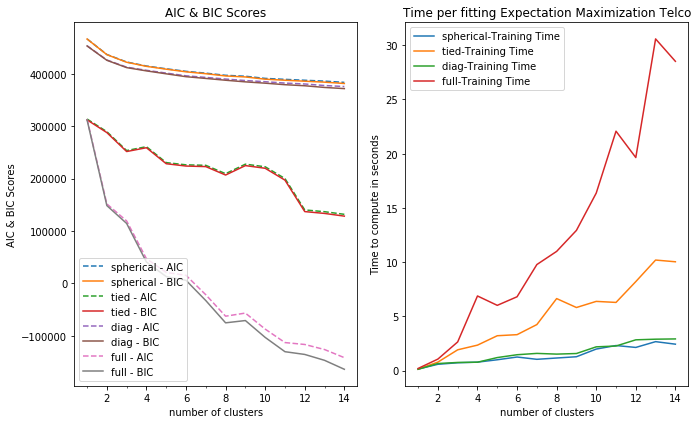

In [411]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols=2, figsize= (10,6))
for i, cv_type in enumerate(cv_types):
    ax1.plot(list(n_components_range),bic_tel_rca[i*len(n_components_range):(i+1)*len(n_components_range)],
             linestyle = '--', label = f'{cv_type} - AIC')
    ax1.plot(list(n_components_range),aic_tel_rca[i*len(n_components_range):(i+1)*len(n_components_range)],
             label = f'{cv_type} - BIC')
    ax1.legend(loc='best')
    ax1.set_title('AIC & BIC Scores')
    ax1.set_xlabel('number of clusters')
    ax1.set_ylabel('AIC & BIC Scores')
    ax1.set_xticks(list(n_components_range), minor=True)
    ax2.plot(list(n_components_range),time_tell_rca[i*len(n_components_range):(i+1)*len(n_components_range)],
             label = f'{cv_type}-Training Time')
    ax2.set_xlabel('number of clusters')
    ax2.set_ylabel('Time to compute in seconds')
    ax2.set_xticks(list(n_components_range), minor=True)
    ax2.set_title('Time per fitting Expectation Maximization Telco')
    ax2.legend()
fig.tight_layout()

## Telco Best Expec-Max from RCA

 - After seeing the types of clusters returned in K-means it’s no surprise what was returned. 
 - This is due to random projection and expectation maximization assuming a gaussian process underneath. 
 - Our clusters look like random gaussian data on top of each other. 
 - The cluster centers between k-means and expec max for RP are in similar locations. 
 - This is evident by Cluster 2(green) being almost identical to cluster 1(blue) in k-means, 5b k-means. 
 - Given how close these centers are to each other they don’t appear to be compact but will check later with silhouette score.

In [438]:
n_clusters = 7
gmm_best_rca = GaussianMixture(n_components=n_clusters,
                                      covariance_type='full',n_init=10)
gmm_best_rca_labels = gmm_best_rca.fit(telco_X_rand_proj).predict(telco_X_rand_proj)
means = gmm_best_rca.means_

Text(0.5,1,'Telco Dataset with 7 Cluster \n Random Projections')

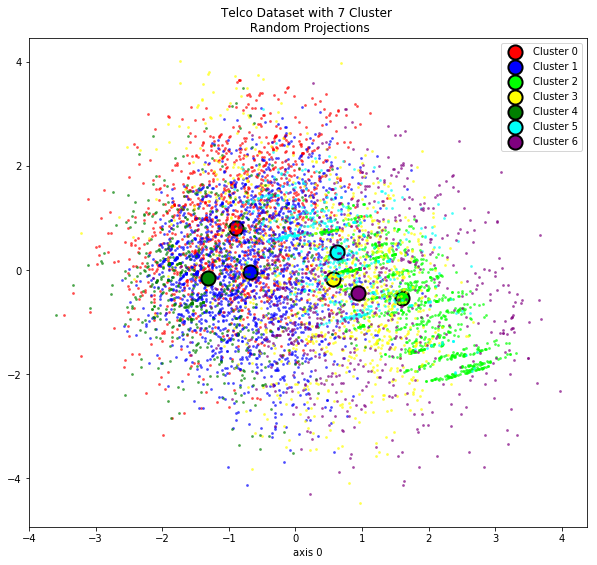

In [420]:
colors = ['#FF0000','#0000FF','#00ff00','#ffff00','#008000','#00fff9' ,'#800080','#FFA500','#16e739','#ff00f4','#FFFF00', '#000000' ,'#FFD700','#808000','#b266b2']
col_map=dict(zip(set(gmm_best_rca_labels),colors))
label_color = [col_map[l] for l in gmm_best_rca_labels]
col1 = 0
col2 = 1

plt.figure(figsize = (10,9))
for i in range(n_clusters):
    plt.scatter(telco_X_rand_proj[gmm_best_rca_labels==i, col1],telco_X_rand_proj[gmm_best_rca_labels==i, col2],marker='.', s=30, lw=0, alpha=0.7, color = colors[i],edgecolor='k')
    plt.scatter(means[i, col1], means[i, col2], c=colors[i], marker='o',alpha=1, s=200, edgecolor='k', linewidths=2, label = f'Cluster {i}')
    plt.xlabel(f'axis {col1}')
    plt.ylabel(f'axis {col2}')
    plt.legend(loc='best')
    plt.ylabel('')

plt.title(f'Telco Dataset with {n_clusters} Cluster \n Random Projections' )

### Homogenity scores

- this is used later on in the report

In [467]:
telco_homo_scores.append(homogeneity_score(y,gmm_best_rca_labels))
# Add in sil score
tel_sil_score.append(silhouette_score(telco_X_rand_proj, gmm_best_rca_labels, metric='euclidean'))
telco_homo_text.append('ExecMax RCA')

## Comparison of Clusters for Telco Dataset

### Homogenity Scores

 - When comparing all of these feature transformations and cluster algorithms we want to see how they line up with our class labels and how compact the cluster are. 
 - In order to do this, we employed homogeneity score and a silhouette score.
   - A cluster is homogenous if all class labels in the cluster are the same. 
   - We want our score to be as high as possible. 
 - Here the two best dimensionality reductions are feature selection for kmeans and expec max. 
 - We believe this to be due to the filtering method picking up on features that are of most relevance. 
 - PCA is the second best, this is probably a case of us throwing a way a variable which is useful but had low variance, so it was thrown away

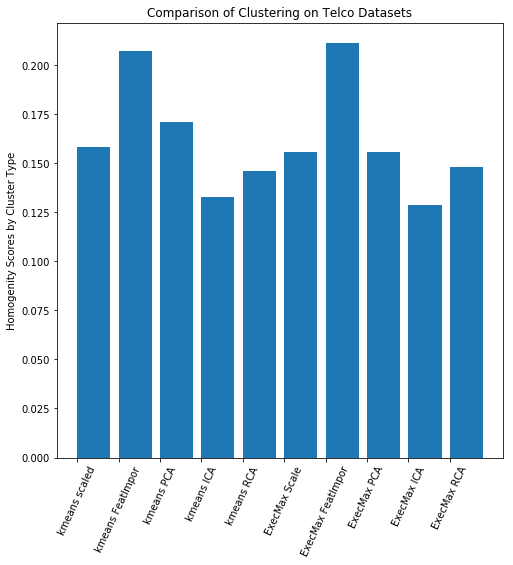

In [468]:
plt.figure(figsize = (8,8))
y_pos = np.arange(len(telco_homo_text))
plt.bar(y_pos,telco_homo_scores, align='edge')
plt.xticks(y_pos, telco_homo_text,rotation = 65)
plt.ylabel('Homogenity Scores by Cluster Type')
plt.title('Comparison of Clustering on Telco Datasets')
plt.show()

## Comparison of Clustering Compactness

### Silhouette Scores

 - We also need to see the compactness of our clusters.
 - We used a measure called Silhouette score to tell us this.
 - Silhouette score tells us how similar an object is to its own cluster compared to other clusters.
 - Values close to 1 represent values identified well for its cluster where as a value of -1 would say its poorly matched and it belongs in a different cluster.
 - All clustering algorithms have a value 0 which indicate that our clusters are not overlapping or are relatively compact 
 - We see again, feature importance having much higher values than others.
 - This tells us this we are getting clusters that a very similar within and different between. We can say we have compact clusters for feature importance.

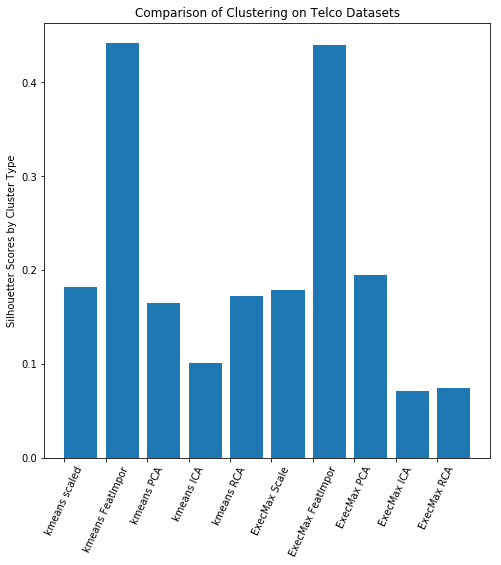

In [469]:
plt.figure(figsize = (8,8))
y_pos = np.arange(len(telco_homo_text))
plt.bar(y_pos,tel_sil_score, align='edge')
plt.xticks(y_pos, telco_homo_text,rotation = 65)
plt.ylabel('Silhouetter Scores by Cluster Type')
plt.title('Comparison of Clustering on Telco Datasets')
plt.show()

# Telco Neural Net Performance

### Run neural network learner from assignment 3 on the data after dimensionality reduction (from task 2). Explain and plot your observations (error rates, etc.) 

 - We want to see if all of these are similar or different in terms of ROC/AUC Score
 - Looking at the ROC/ACU curves the following are showing a similar AUC score of 84%, all scaled(telco_scale), feature selection, PCA & RCA. 
 - The next best scores are ICA and homework 3 and 81% and the last is labels only at 64%. 

telco_scale had an auc score of 0.8372
telco_feat_imp had an auc score of 0.8433
telco_PCA had an auc score of 0.8499
telco_ICA had an auc score of 0.8163
telco_RCA had an auc score of 0.8413
homework 3 had an auc score of 0.8197
labels only had an auc score of 0.6378


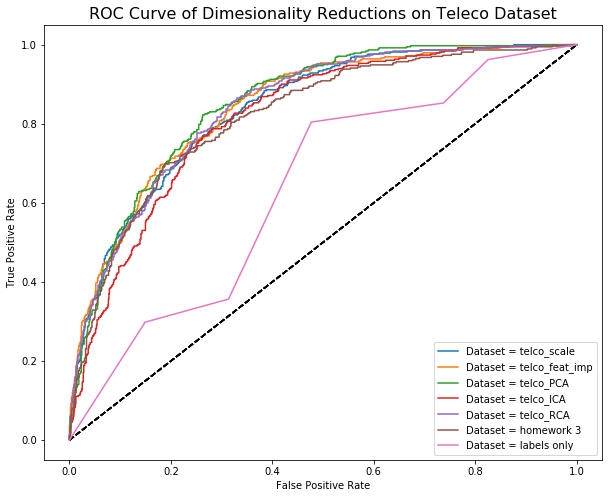

In [471]:
#################################
#
# Now on to the real stuff
#
#################################
tel_labels_nn = kmeans_tel.labels_
telco_X_train_nn, telco_X_test_nn, y_train_nn, y_test_nn = train_test_split(tel_labels_nn, y, test_size = .20, shuffle = True)
telco_X_train_nn = telco_X_train_nn[:,np.newaxis]
telco_X_test_nn = telco_X_test_nn[:,np.newaxis]

telco_datasets = {'telco_scale': telco_X_scale, 'telco_feat_imp':telco_X_scale_featimp, 'telco_PCA':telco_X_pca,  'telco_ICA':telco_X_ica,  'telco_RCA':telco_X_rand_proj, 'homework 3':1, 'labels only':1}
activation = 'sigmoid' 
layers = 1
starting_node = 120
epoch = 75

plt.figure(figsize = (10,8))
for key, dataset in telco_datasets.items():
    if key == 'homework 3':
        _,  pred, pred_prob = layers_exp(1,starting_node,telco_X_hwk3_train, telco_y_hwk3_train, telco_X_hwk3_test, telco_y_hwk3_test
                                         , activation = activation, epochs = epoch, batch_size = 400,verbose=0,class_pred=True)
        fpr, tpr, _ = roc_curve(telco_y_hwk3_test, pred_prob)
        auc_score = roc_auc_score(telco_y_hwk3_test, pred_prob)
        print(f'{key} had an auc score of {np.round(auc_score, decimals = 4)}')
    elif key == 'labels only':
        _,  pred, pred_prob = layers_exp(1,starting_node,telco_X_train_nn, y_train_nn, telco_X_test_nn, y_test_nn
                                         , activation = activation, epochs = epoch, batch_size = 400,verbose=0, class_pred=True)
        fpr, tpr, _ = roc_curve(y_test_nn, pred_prob)
        auc_score = roc_auc_score(y_test_nn, pred_prob)
        print(f'{key} had an auc score of {np.round(auc_score, decimals = 4)}')
    else:
        x_train, x_test, y_train, y_test = train_test_split(dataset, y, test_size = .20, shuffle = True)
        _,  pred, pred_prob = layers_exp(1,starting_node,x_train, y_train, x_test, y_test
                                         , activation = activation, epochs = epoch, batch_size = 400,verbose=0,class_pred=True)
        fpr, tpr, _ = roc_curve(y_test, pred_prob)
        auc_score = roc_auc_score(y_test, pred_prob)
        print(f'{key} had an auc score of {np.round(auc_score, decimals = 4)}')
    plt.title('ROC Curve of Dimesionality Reductions on Teleco Dataset', fontsize = 16)
    plt.plot([0,1],[0,1], 'k--')
    plt.plot(fpr, tpr, label = f'Dataset = {key}')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()

plt.show()

# Neural Net Error Rates - Telco

## Comparing and contrasting the error rates of the different dimesonalities

 - Looking at both Accuracy and Loss we see that telco_scaled, PCA, RCA and results from homework 3 all perform the same. 
 - Feature selection is not too far behind our top performers.
 - Both ICA and labels only from task 1 had the highest loss and lowest accuracy. 
 - Also, all seem to take the same amount of time to run, 11-12 seconds.

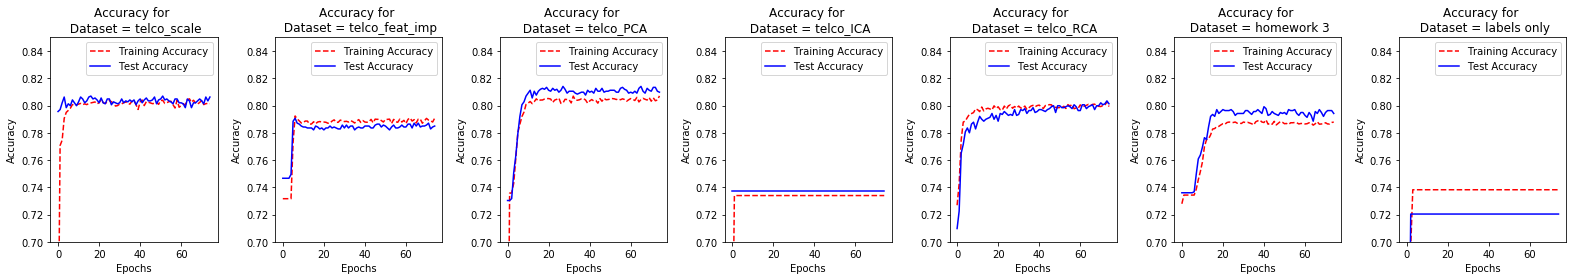

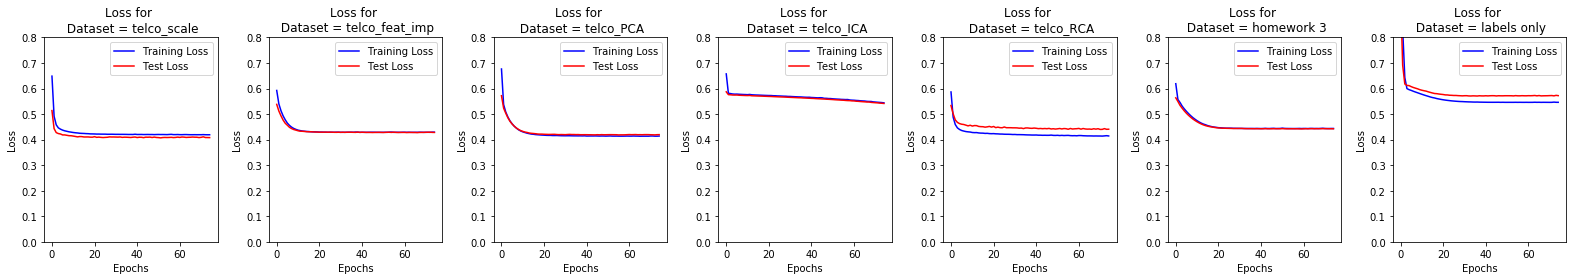

In [472]:
telco_datasets = {'telco_scale': telco_X_scale, 'telco_feat_imp':telco_X_scale_featimp, 'telco_PCA':telco_X_pca,  'telco_ICA':telco_X_ica,  'telco_RCA':telco_X_rand_proj, 'homework 3':1, 'labels only':1}
layers_to_test = 1
activation = 'sigmoid'
activ_len= len(activation)
starting_node = 120
epochs = 75

###################################################################################################
#
# This is for labels only
#
###################################################################################################
tel_labels_nn = kmeans_tel.labels_
telco_X_train_nn, telco_X_test_nn, y_train_nn, y_test_nn = train_test_split(tel_labels_nn, y, test_size = .20, shuffle = True)
telco_X_train_nn = telco_X_train_nn[:,np.newaxis]
telco_X_test_nn = telco_X_test_nn[:,np.newaxis]


###################################################################################################
#
# Set up the plots
#
###################################################################################################

fig, axs = plt.subplots(nrows=1,ncols=len(telco_datasets), figsize=(22, 4), facecolor='w', edgecolor='k')
axs = axs.ravel()

figs, axes = plt.subplots(nrows=1,ncols=len(telco_datasets), figsize=(22, 4), facecolor='w', edgecolor='k')
axes = axes.ravel()


###################################################################################################
#
# Start Looping
#
###################################################################################################
subplot_numb = 0
train_time = []
for key, dataset in telco_datasets.items():
    if key == 'homework 3':
        start = time()
        history = layers_exp(1,starting_node,telco_X_hwk3_train, telco_y_hwk3_train, telco_X_hwk3_test, telco_y_hwk3_test
                             , activation = activation, epochs = epochs, batch_size = 400,verbose=0, class_pred=False)
        end = time()
        train_time.append(end-start)
    elif key == 'labels only':
        start = time()
        history = layers_exp(1,starting_node,telco_X_train_nn, y_train_nn, telco_X_test_nn, y_test_nn
                             , activation = activation, epochs = epochs, batch_size = 400,verbose=0, class_pred=False)
        end = time()
        train_time.append(end-start)
    else:
        x_train, x_test, y_train, y_test = train_test_split(dataset, y, test_size = .20, shuffle = True)
        start = time()
        history = layers_exp(1,starting_node,x_train, y_train, x_test, y_test
                             , activation = activation, epochs = epochs, batch_size = 400,verbose=0, class_pred=False)
        end = time()
        train_time.append(end-start)

    # Get training and test accuracy histories
    training_accuracy = history.history['acc']
    test_accuracy = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

        # Create count of the number of epochs
        #layer_count = range(1, len(layers_to_test)+1)
        #subplot_numb = i-1 + row
        #second_row = subplot_numb + len(layers_to_test)

    # Visualize accuracy history
    axs[subplot_numb].plot(training_accuracy, 'r--')
    axs[subplot_numb].plot(test_accuracy, 'b-')
    axs[subplot_numb].legend(['Training Accuracy', 'Test Accuracy'])
    axs[subplot_numb].set_title(f'Accuracy for \n Dataset = {key}')
    axs[subplot_numb].set_xlabel('Epochs')
    axs[subplot_numb].set_ylabel('Accuracy')
    axs[subplot_numb].set_ylim(0.7,.85)

    axes[subplot_numb].plot(loss, 'b-')
    axes[subplot_numb].plot(val_loss, 'r-')
    axes[subplot_numb].legend(['Training Loss', 'Test Loss'])
    axes[subplot_numb].set_title(f'Loss for \n Dataset = {key}')
    axes[subplot_numb].set_xlabel('Epochs')
    axes[subplot_numb].set_ylabel('Loss')
    axes[subplot_numb].set_ylim(0,.8)
       
    subplot_numb += 1
    
fig.tight_layout()
figs.tight_layout()

#### Comments

 - All of them take roughly the same time to run

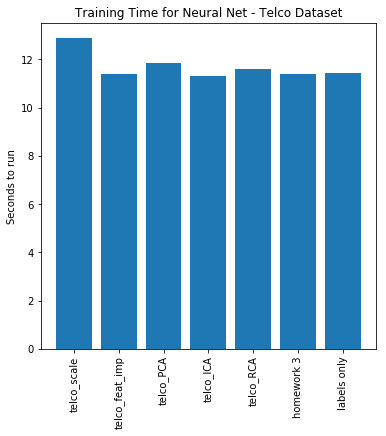

In [474]:
plt.figure(figsize = (6,6))
y_pos = np.arange(len(telco_datasets))
plt.bar(y_pos,train_time, align='center')
plt.xticks(y_pos, telco_datasets.keys(),rotation = 90)
plt.ylabel('Seconds to run')
plt.title('Training Time for Neural Net - Telco Dataset')
plt.show()

# FACEBOOK BEGINS HERE
# FACEBOOK BEGINS HERE
# FACEBOOK BEGINS HERE
# FACEBOOK BEGINS HERE
# FACEBOOK BEGINS HERE

# Facebook Standard Scaling

 - Scaling data similar to how we did in previous assignments
 - this is done to reduce computation time


In [8]:
final_df['num_comm_l24_sq'] = final_df['num_comm_l24']**2
final_df['page_talk_l24'] = final_df['page_talk_bt']*final_df['num_comm_l24']
final_df['comm_h_hour_bin'] = np.where(final_df['comm_h_hours'] >0 ,1,0)
final_df2 = final_df.drop(columns = 'comm_h_hours')
X_fb = final_df2.iloc[:,:-1].values
y_fb = final_df2.iloc[:,-1].values

###############################################################################
#
# features from last assignments
# we found these to offer too high of variance
#
###############################################################################
# All Features
full_xscaler = StandardScaler().fit(X_fb)
fb_x_scale = full_xscaler.transform(X_fb)

random_state = 20190301
pca_fb = PCA(random_state=random_state)
fb_X_pca = pca_fb.fit_transform(fb_x_scale)


# Facebook PCA

1. Scaling the features is important as it optimizes computation time for our algorithms.
2. After we split and scale the data we then apply Principle Components Analysis to the data.
 - We are applying PCA to our data as it accomplishes a couple of things:
  - it reduces our dimensions from 50+ dimensions to 22 dimensions (58% decrease) while still retaining 90% of the variance from our original data.
  - how it performs this is by taking variables which are correlated to each other and turns them into uncorrelated variables called principle components.
  - this is important as it will take less time to fit our model while still retaining the majority of the variance from our original data.


- We are using 90% of the variance explained from PCA as the number of features. 
- This reduces our features from 55 to 22. We choose 90% because going from 80% to 90% only increased the dimensions by a small amount.

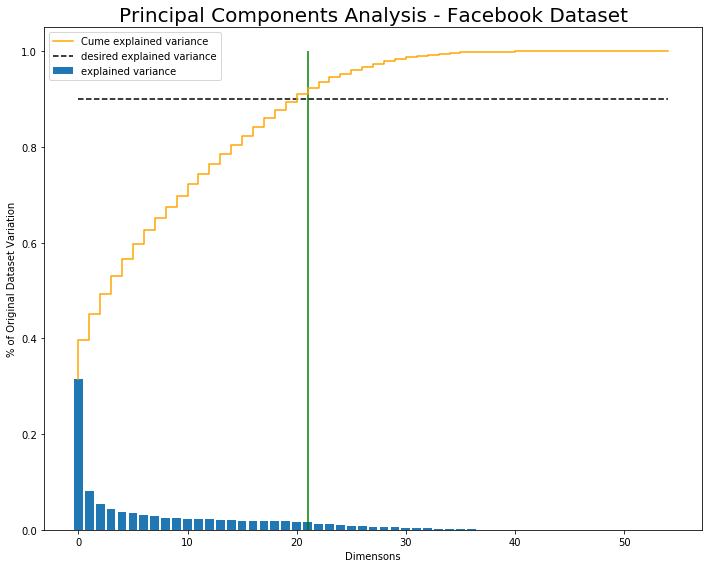

In [9]:
ratio_exp = .90
plt.figure(figsize = (10,8))
cum_var = np.cumsum(pca_fb.explained_variance_ratio_)
plt.bar(range(0,len(pca_fb.explained_variance_ratio_)),pca_fb.explained_variance_ratio_, label='explained variance')
plt.step(range(0,len(pca_fb.explained_variance_ratio_)), cum_var, label='Cume explained variance', color='orange')
plt.vlines(x = np.argmax(cum_var >= ratio_exp),ymin=0, ymax=1, color='green')
plt.hlines(y = ratio_exp,xmin = 0, xmax=54
           ,linestyles = '--',label = 'desired explained variance')
plt.title('Principal Components Analysis - Facebook Dataset', fontsize=20)
plt.xlabel('Dimensons')
plt.ylabel('% of Original Dataset Variation')
plt.legend()
plt.tight_layout()

In [10]:
pca_fb = PCA(n_components = .9, random_state=random_state)
fb_X_pca = pca_fb.fit_transform(fb_x_scale)

# Facebook ICA

 - Finding the correct number of components with ICA is tough. 
 - ICA is trying to parse out the underlying signals from the data, i.e maximizing independence.
 - This is done by keeping mutual information as high as possible with original features and keeping the new features independent. 
 - In the end, we ended going with the same number of dimensions as PCA, 22. 
 - This was done to keep things similar when comparing between feature transformation techniques.
 
#### Please note plots below were jused used for experimenting to see how data is projected. Full comments on data projection are in the respective cluster experiments

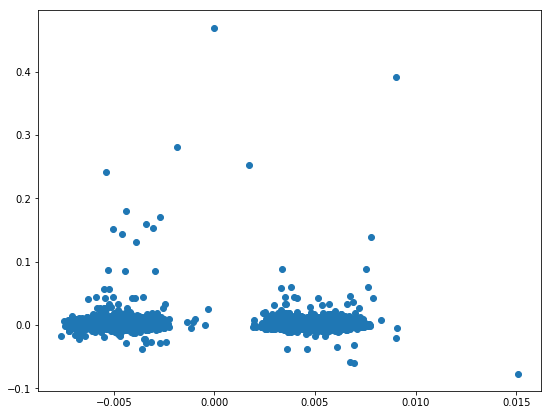

In [623]:
# Compute ICA
fb_ica = FastICA(n_components=22, random_state=random_state)
fb_X_ica = fb_ica.fit_transform(fb_x_scale)  # Reconstruct signals
A_ = fb_ica.mixing_  # Get estimated mixing matrix

plt.figure(figsize = (9,7))
#for i in list(range(0,fb_X_ica.shape[1])):
#    plt.plot(fb_X_ica[:, i], label = f'index {i}')
#    plt.legend()
#    plt.xlabel('Index number')
#    plt.ylabel('Signals')
plt.plot(fb_X_ica[:, 0], fb_X_ica[:, 18], linestyle = '', marker = 'o',label = f'two indexes plotted against each other')

# Facebook Random Projection

 - Finding the correct number of components with random projections can be tough because it’s a bit arbitrary. 
 - Random projections are taking random directions and projecting the data onto these random directions. 
 - The benefit of this RP being able to still pick up on correlation between features. 
 - Since our lecture notes state that RP features need to be slightly higher than PCA or ICA, we went with 25 features. 
 
 #### Please note plots below were jused used for experimenting to see how data is projected. Full comments on data projection are in the respective cluster experiments

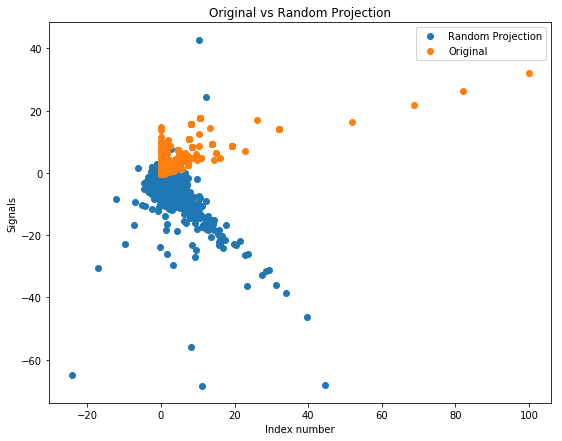

In [526]:
# Compute ICA
grp_tel_fb = GaussianRandomProjection(n_components = 25, random_state= random_state)
fb_X_rand_proj= grp_tel_fb.fit_transform(fb_x_scale)
fb_X_rand_proj.shape

plt.figure(figsize = (9,7))
plt.plot(fb_X_rand_proj[:, 4],fb_X_rand_proj[:,7], marker = 'o', linestyle = '', label='Random Projection')
plt.plot(fb_x_scale[:, 4],fb_x_scale[:,7], marker = 'o', linestyle = '', label='Original')
plt.title('Original vs Random Projection')
plt.xlabel('Index number')
plt.ylabel('Signals')
plt.legend()

# Facebook K-Means Clustering - Scaled All Features

#### Grid Search Results

 - To select our k, we performed a grid search between 1 and 15, k. 
 - We looked at the sum of square and plotted that against cluster number. 
 - We employed first differencing as way to find the optimal cluster via “elbow” method. 
 - This returned an optimal value of 4. We also must be cognizant of time too, but this is a quick fit as it takes 4-5 seconds to fit

In [621]:
min_clust = 1
max_clust = 15
k_numbs = list(range(min_clust,max_clust))
km_param_grid = {'n_clusters': k_numbs}
ess_fb_all = []
time_fb_all = []

for i in k_numbs:
    start = time()
    kmeans_fb = KMeans(n_clusters = i,n_jobs = -1,n_init = 20,max_iter = 400)
    kmeans_fb.fit(fb_x_scale)
    end = time()
    time_diff = end-start
    time_fb_all.append(time_diff)
    ess_fb_all.append(kmeans_fb.inertia_)

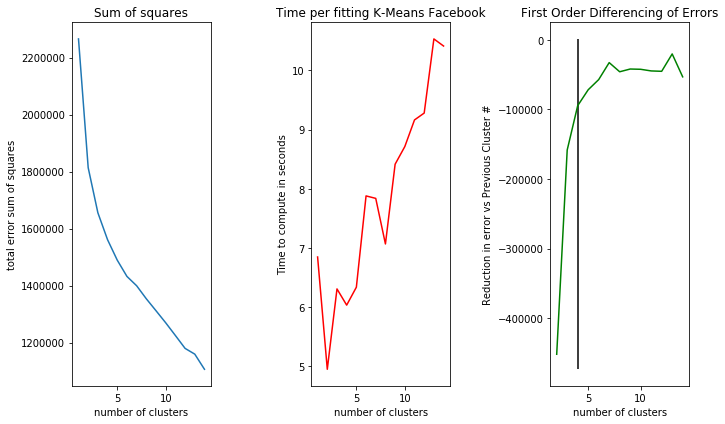

In [622]:
plot_grid_kmeans(ess_fb_all,time_fb_all,k_numbs, title2 = 'Time per fitting K-Means Facebook', figsize=(10,6))

## Facebook Best Kmeans from scaled All Features

- Looking at the clusters we got back they we see there is a lot of data points at the bottom and close to the origin. 
- This is due to a lot of data points at the bottom and close to the origin. 
- Our cluster become less dense as we move away from the origin due to the spread of our data. 
- We got these clusters due to the scaled nature of the data.

In [478]:
n_clusters = 4
kmeans_fb = KMeans(n_clusters = n_clusters,n_jobs = -1,n_init = 20,max_iter = 400)
kmeans_fb.fit(fb_x_scale)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=400,
    n_clusters=4, n_init=20, n_jobs=-1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

Text(0.5,1,'Facebook Dataset with 4 \n Clusters All Features')

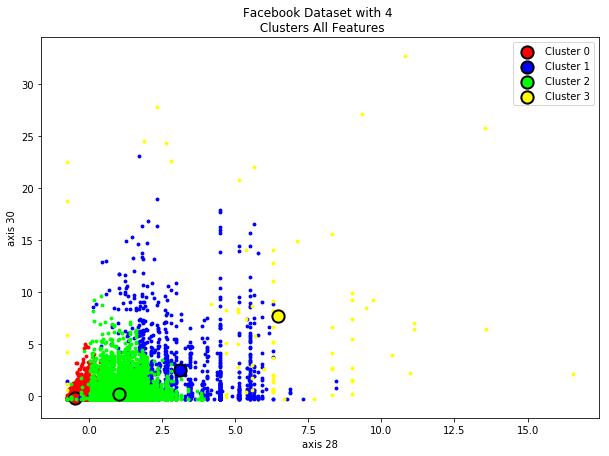

In [485]:
fb_kmeans_cent = kmeans_fb.cluster_centers_
colors = ['#FF0000','#0000FF','#00ff00','#ffff00','#008000','#00fff9' ,'#800080','#FFA500','#16e739','#ff00f4','#FFFF00', '#000000' ,'#FFD700','#808000','#b266b2']
labels = kmeans_fb.labels_
col_map=dict(zip(set(labels),colors))
label_color = [col_map[l] for l in labels]
col1 = 28
col2 = 30


plt.figure(figsize = (10,7))
for i in range(n_clusters):
    plt.scatter(fb_x_scale[labels==i, col1],fb_x_scale[labels==i, col2],marker='.', s=60, lw=0, alpha=1, color = colors[i],edgecolor='k')
    plt.scatter(fb_kmeans_cent[i, col1], fb_kmeans_cent[i, col2], c=colors[i], marker='o',alpha=1, s=150, edgecolor='black', linewidths=2, label = f'Cluster {i}')
    plt.xlabel(f'axis {col1}')
    plt.ylabel(f'axis {col2}')
    plt.legend(loc='best')
    
plt.title(f'Facebook Dataset with {n_clusters} \n Clusters All Features' )

### Homogenity scores

- this is used later on in the report

In [601]:
fb_homo_scores = []
fb_homo_text = []
fb_sil_score = []
fb_sil_score_samp = []

fb_tel_scaled_labels = kmeans_fb.labels_

fb_homo_scores.append(homogeneity_score(y_fb,fb_tel_scaled_labels))
# have to do a sample or computer will crash due to memory explosion
for i in range(0,500):
    fb_sil_score_samp.append(silhouette_score(fb_x_scale,fb_tel_scaled_labels , metric='euclidean', sample_size=2000))
fb_sil_score.append(np.mean(fb_sil_score_samp))
fb_homo_text.append('kmeans all scaled')

# Facebook K-Means Clustering on Feature Selection

 - We used our final decision tree from homework 3 (depth of 6) to help us select our features. 
 - We choose all features which had an importance of > 0. 
 - This resulted in reducing our features from 55 to 25. 
 - We used entropy as our splitting criterion.


In [488]:
#best Decision tree
clf_dt_fb = tree.DecisionTreeClassifier(max_depth=6, criterion='entropy')
clf_dt_fb.fit(fb_x_scale,y_fb) # only scaled so it includes all

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=6,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

### Find feature importances > 0%

In [596]:
fb_dec_tree_impor = pd.DataFrame(clf_dt_fb.feature_importances_, index = [final_df2.iloc[0:1,:-1].columns], columns=['importance']).sort_values(by='importance', ascending=False)
fb_dec_tree_impor = fb_dec_tree_impor.reset_index().rename(columns={'level_0': 'features'}, level=0)
fb_impor_feats = fb_dec_tree_impor[fb_dec_tree_impor.importance > 0].features.tolist()
fb_dec_tree_impor[fb_dec_tree_impor.importance > 0]

,features,importance
0,num_comm_l24_sq,0.649344
1,num_comm_l24,0.162767
2,base_time,0.119811
3,num_comm_pre_24_48,0.014344
4,tot_med,0.013493
5,pst_shre_cnt,0.008979
6,h_hours,0.006531
7,l24_48_med,0.004088
8,num_comm_diff_24_48,0.003430
9,num_comm_pre,0.002526


In [490]:
# we are finding the top features
# find rows where feat importance is greater than 0
fb_x_scale_featimp = fb_x_scale[:,clf_dt_fb.feature_importances_ > 0]

# Facebook Best K means on top features from  Feature Selection

#### Grid Search Results

 - To select our k, we performed a grid search between 1 and 15, k. 
 - We looked at the sum of square and plotted that against cluster number. 
 - We employed first differencing as way to find the optimal cluster via “elbow” method. 
 - This returned an optimal value of 4. We also must be cognizant of time too, but this is a quick fit as it takes 4-5 seconds to fit

In [493]:
k_numbs = list(range(1,15))
km_param_grid = {'n_clusters': k_numbs}
ess_fb_featimpo = []
time_fb_featimpo = []

for i in k_numbs:
    start = time()
    kmeans_fb_featimp = KMeans(n_clusters = i,n_jobs = -1,n_init = 20,max_iter = 400)
    kmeans_fb_featimp.fit(fb_x_scale_featimp)
    end = time()
    time_diff = end-start
    time_fb_featimpo.append(time_diff)
    ess_fb_featimpo.append(kmeans_fb_featimp.inertia_)

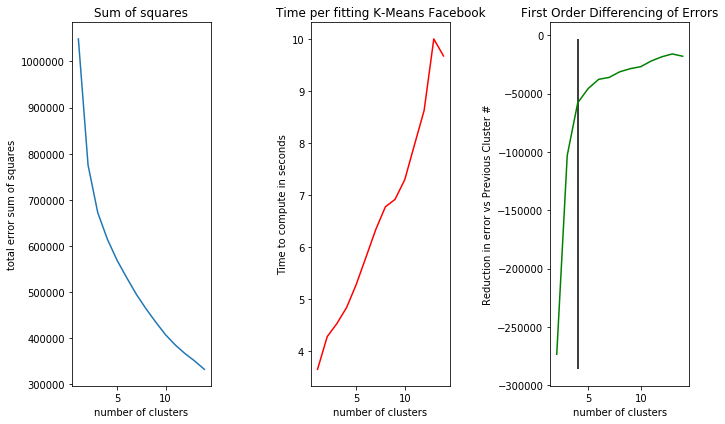

In [496]:
plot_grid_kmeans(ess_fb_featimpo,time_fb_featimpo,k_numbs,x_vline=4, title2 = 'Time per fitting K-Means Facebook', figsize=(10,6))

## Facebook Best Kmeans - Feature Selection via Decision Tree
 - I believe we got the types of clusters we did was based on the data density. 
 - This was very similar to what 1b returned. 
 - Data close to the origin are higher density, whereas, as you go away from origin they tend to be spread out and a different cluster is capturing that.


In [497]:
# Variables
n_clusters = 4

# KMeans
kmeans_fb_fs = KMeans(n_clusters = n_clusters,n_jobs = -1,n_init = 20,max_iter = 400)
kmeans_fb_fs.fit(fb_x_scale_featimp)

# Grab the Centers and labels
kmeans_fb_fs_cent = kmeans_fb_fs.cluster_centers_

Text(0.5,1,'Facebook Dataset with 4 Clusers \n Feature Selection')

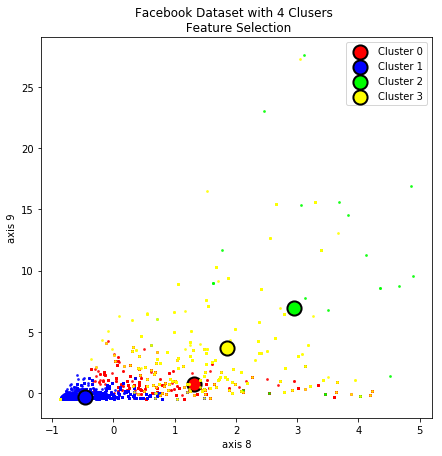

In [512]:
colors = ['#FF0000','#0000FF','#00ff00','#ffff00','#008000','#00fff9' ,'#800080','#FFA500','#16e739','#ff00f4','#FFFF00', '#000000' ,'#FFD700','#808000','#b266b2']
labels = kmeans_fb_fs.labels_
col_map=dict(zip(set(labels),colors))
label_color = [col_map[l] for l in labels]
col1 = 8
col2 = 9


plt.figure(figsize = (7,7))
for i in range(n_clusters):
    plt.scatter(fb_x_scale_featimp[labels==i, col1],fb_x_scale_featimp[labels==i, col2],marker='.', s=30, lw=0, alpha=0.9, color = colors[i],edgecolor='k')
    plt.scatter(kmeans_fb_fs_cent[i, col1], kmeans_fb_fs_cent[i, col2], c=colors[i], marker='o',alpha=1, s=200, edgecolor='k', linewidths=2, label = f'Cluster {i}')
    plt.xlabel(f'axis {col1}')
    plt.ylabel(f'axis {col2}')
    plt.legend(loc='best')

plt.title(f'Facebook Dataset with {n_clusters} Clusers \n Feature Selection' )

### Homogenity scores

- this is used later on in the report

In [602]:
fb_tel_scaled_labels = kmeans_fb_fs.labels_
fb_sil_score_samp = []

fb_homo_scores.append(homogeneity_score(y_fb,fb_tel_scaled_labels))
# have to do a sample or computer will crash due to memory explosion
for i in range(0,500):
    fb_sil_score_samp.append(silhouette_score(fb_x_scale_featimp,fb_tel_scaled_labels , metric='euclidean', sample_size=2000))
fb_sil_score.append(np.mean(fb_sil_score_samp))
fb_homo_text.append('kmeans FeatImpor')

# Facebook Dimensonality Reductions - PCA - K-Means

#### Grid Search Results

 - To select our k, we performed a grid search between 1 and 15, k. 
 - We looked at the sum of square and plotted that against cluster number. 
 - We employed first differencing as way to find the optimal cluster via “elbow” method. 
 - This returned an optimal value of 4. We also must be cognizant of time because as we increase cluster, we increase time. 
 - This only took 4 seconds to fit, though. 


In [503]:
k_numbs = list(range(1,15))
km_param_grid = {'n_clusters': k_numbs}

In [504]:
ess_fb_pca = []
time_fb_pca = []

for i in k_numbs:
    start = time()
    kmeans_fb_pca = KMeans(n_clusters = i,n_jobs = -1,n_init = 20,max_iter = 400)
    kmeans_fb_pca.fit(fb_X_pca)
    end = time()
    time_diff = end-start
    time_fb_pca.append(time_diff)
    ess_fb_pca.append(kmeans_fb_pca.inertia_)

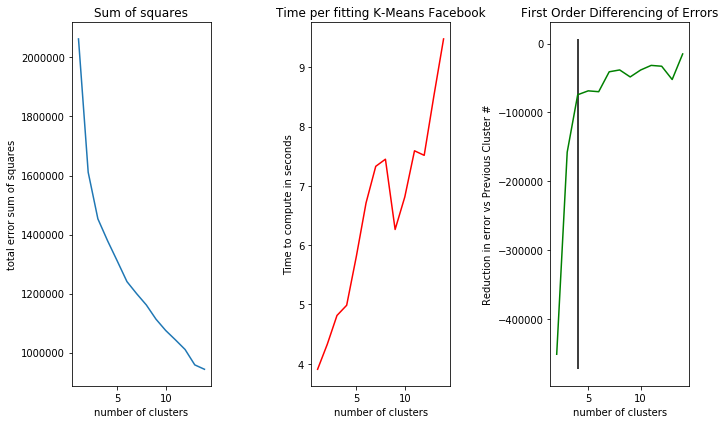

In [505]:
plot_grid_kmeans(ess_fb_pca,time_fb_pca,k_numbs,x_vline=4, title2 = 'Time per fitting K-Means Facebook', figsize=(10,6))

## Facebook Best K-means - PCA
 - The cluster types we are getting back from PCA are trapezoidal in shape. 
 - This doesn’t surprise us as PCA is forcing our data to be mutually orthogonal.
 - Most of our data density is down at the origin which explains why most of cluster are there. 
 - As the variability increases our cluster centers become further out. 


In [62]:
# Variables
n_clusters = 4

# KMeans
kmeans_fb_pca_best = KMeans(n_clusters = n_clusters,n_jobs = -1,n_init = 20,max_iter = 400)
kmeans_fb_pca_best.fit(fb_X_pca)

# Grab the Centers and labels
kmeans_fb_pca_cent = kmeans_fb_pca_best.cluster_centers_

Text(0.5,1,'FB Dataset with 4 Clusters \n PCA Transformation')

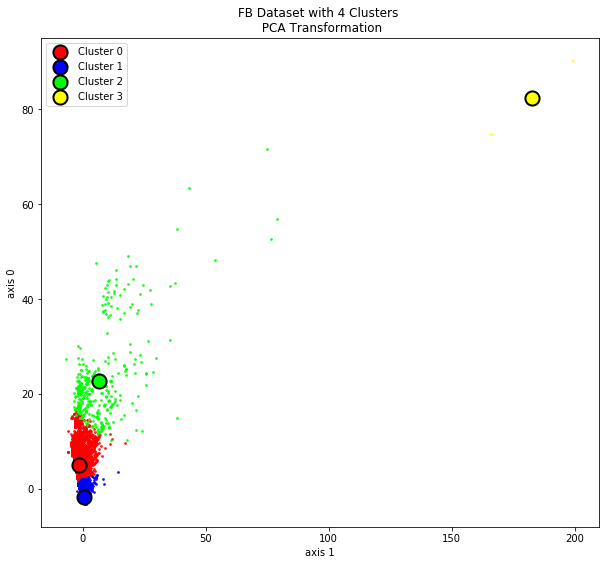

In [509]:
colors = ['#FF0000','#0000FF','#00ff00','#ffff00','#008000','#00fff9' ,'#800080','#FFA500','#16e739','#ff00f4','#FFFF00', '#000000' ,'#FFD700','#808000','#b266b2']
labels = kmeans_fb_pca_best.labels_
col_map=dict(zip(set(labels),colors))
label_color = [col_map[l] for l in labels]
col1 = 1
col2 = 0


plt.figure(figsize = (10,9))
for i in range(n_clusters):
    plt.scatter(fb_X_pca[labels==i, col1],fb_X_pca[labels==i, col2],marker='.', s=30, lw=0, alpha=0.9, color = colors[i],edgecolor='k')
    plt.scatter(kmeans_fb_pca_cent[i, col1], kmeans_fb_pca_cent[i, col2], c=colors[i], marker='o',alpha=1, s=200, edgecolor='k', linewidths=2, label = f'Cluster {i}')
    plt.xlabel(f'axis {col1}')
    plt.ylabel(f'axis {col2}')
    plt.legend(loc='best')

plt.title(f'FB Dataset with {n_clusters} Clusters \n PCA Transformation' )

### Homogenity scores

- this is used later on in the report

In [603]:
fb_tel_scaled_labels = kmeans_fb_pca_best.labels_
fb_sil_score_samp = []

fb_homo_scores.append(homogeneity_score(y_fb,fb_tel_scaled_labels))
# have to do a sample or computer will crash due to memory explosion
for i in range(0,500):
    fb_sil_score_samp.append(silhouette_score(fb_X_pca,fb_tel_scaled_labels , metric='euclidean', sample_size=2000))
fb_sil_score.append(np.mean(fb_sil_score_samp))
fb_homo_text.append('kmeans PCA')

# Facebook Dimensonality Reductions - ICA - K-Means

#### Brief ICA description of what/how we did it
- Finding the correct number of components with ICA is tough. 
- ICA is trying to parse out the underlying signals from the data, i.e maximizing independence.  
- This is done by keeping mutual information as high as possible with original features and keeping the new features independent. 
- In the end, we ended going with the same number of dimensions as PCA, 22. This was done to keep things similar when comparing between feature transformation techniques.


####################################################################################

#### Grid Search Results
 - To select our k, we performed a grid search between 1 and 30, k. 
 - We looked at the sum of square and plotted that against cluster number. 
 - We employed first differencing as way to find the optimal cluster via “elbow” method. 
 - The error sum of square is a very gradual decline and appears to elbow at 14. 
 - We didn’t want to choose a higher number given how much longer it would take. 
 - Our error sum of square numbers appear very small but those numbers are deciving as our underlying values are very small

In [516]:
max_clus = 30
min_clus = 1
k_numbs = list(range(min_clus,max_clus))
km_param_grid = {'n_clusters': k_numbs}

In [517]:
ess_fb_ica = []
time_fb_ica = []
test_homo_score = []

for i in k_numbs:
    start = time()
    kmeans_fb_ica = KMeans(n_clusters = i,n_jobs = -1,n_init = 20,max_iter = 400)
    kmeans_fb_ica.fit(fb_X_ica)
    end = time()
    time_diff = end-start
    time_fb_ica.append(time_diff)
    ess_fb_ica.append(kmeans_fb_ica.inertia_)

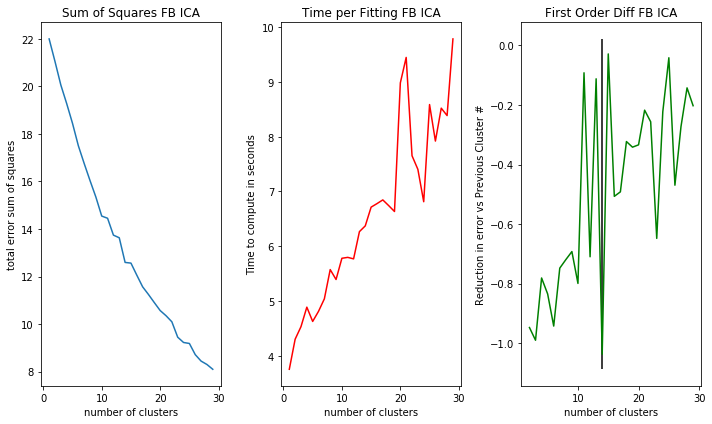

In [521]:
plot_grid_kmeans(ess_fb_ica,time_fb_ica,k_numbs,x_vline=14, title1='Sum of Squares FB ICA', title2 = 'Time per Fitting FB ICA', title3= 'First Order Diff FB ICA', figsize=(10,6))

## Facebook Best K-means - ICA
 - Since ICA is about independence, we can see how this transformation projects our data. 
 - ICA has taken our data and given us 2 distinct separations. 
 - Within these separations we can see groupings of data. 
 - Given that ICA is about independence between features, it’s no surprise why our data is featured this way and why we are getting the types of groupings within our data. 
 - While one would think all these groupings should be their own cluster, and they should be, our clustering algo isn’t finding them. 
 - This is a downside of having these groupings that are independent and spread out, it makes it harder to find optimal clusters. 
 - The reason being k-means can get stuck and stick multiple groups together when it should be its own group. 
 - We employed 20 random restarts to help with this, but we can see some of our clusters are stuck in the middle of the separation. Overall, it’s ok as it’s finding some unique groupings but it also has cluster in the middle of the seperation.


In [519]:
# Variables
n_clusters =14

# KMeans
kmeans_fb_ica_best = KMeans(n_clusters = n_clusters,n_jobs = -1,n_init = 20,max_iter = 400)
kmeans_fb_ica_best.fit(fb_X_ica)

# Grab the Centers and labels
kmeans_fb_ica_cent = kmeans_fb_ica_best.cluster_centers_

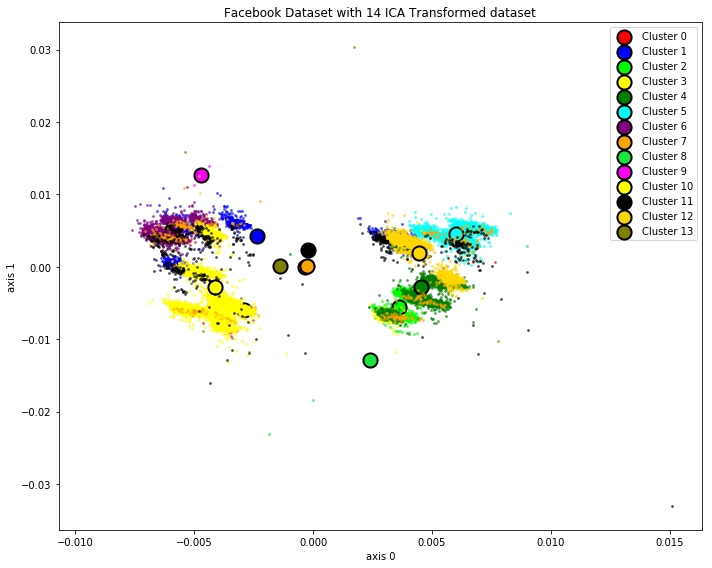

In [520]:
colors = ['#FF0000','#0000FF','#00ff00','#ffff00','#008000','#00fff9' ,'#800080','#FFA500','#16e739','#ff00f4','#FFFF00', '#000000' ,'#FFD700','#808000','#b266b2','#a0bfbf','#26619c','#26619c','#5bc0de']
labels = kmeans_fb_ica_best.labels_
col_map=dict(zip(set(labels),colors))
label_color = [col_map[l] for l in labels]
col1 = 0
col2 = 1


plt.figure(figsize = (10,8))
for i in range(n_clusters):
    plt.scatter(fb_X_ica[labels==i, col1],fb_X_ica[labels==i, col2],marker='.', s=30, lw=0, alpha=0.7, color = colors[i],edgecolor='k')
    plt.scatter(kmeans_fb_ica_cent[i, col1], kmeans_fb_ica_cent[i, col2], c=colors[i], marker='o',alpha=1, s=200, edgecolor='k', linewidths=2, label = f'Cluster {i}')
    plt.xlabel(f'axis {col1}')
    plt.ylabel(f'axis {col2}')
    plt.legend(loc='best')

plt.title(f'Facebook Dataset with {n_clusters} ICA Transformed dataset' )
plt.tight_layout()

### Homogenity scores

- this is used later on in the report

In [604]:
fb_tel_scaled_labels = kmeans_fb_ica_best.labels_
fb_sil_score_samp = []

fb_homo_scores.append(homogeneity_score(y_fb,fb_tel_scaled_labels))
# have to do a sample or computer will crash due to memory explosion
for i in range(0,500):
    fb_sil_score_samp.append(silhouette_score(fb_X_ica,fb_tel_scaled_labels , metric='euclidean', sample_size=2000))
fb_sil_score.append(np.mean(fb_sil_score_samp))
fb_homo_text.append('kmeans ICA')

# Facebook Dimensonality Reductions - RCA - K-Means

#### Brief ICA description of what/how we did it

 - Finding the correct number of components with random projections can be tough because it’s a bit arbitrary. 
 - Random projections are taking random directions and projecting the data onto these random directions. 
 - The benefit of this RP being able to still pick up on correlation between features. 
 - Since our lecture notes state that RP features need to be slightly higher than PCA or ICA, we went with 25 features. 

####################################################################################

#### Grid Search Results 
 - To select our k, we performed a grid search between 1 and 20, k. 
 - We looked at the sum of square and plotted that against cluster number. 
 - We employed first differencing as way to find the optimal cluster via “elbow” method. 
 - This returned an optimal value of 5. We also must be cognizant of time because as we increase cluster, we increase time. This only took 5 seconds to fit, though. 


In [527]:
max_clus = 20
min_clus = 1
k_numbs = list(range(min_clus,max_clus))
km_param_grid = {'n_clusters': k_numbs}

In [528]:
ess_fb_rpa = []
time_fb_rpa = []

for i in k_numbs:
    start = time()
    kmeans_fb_rpa = KMeans(n_clusters = i,n_jobs = -1,n_init = 20,max_iter = 400)
    kmeans_fb_rpa.fit(fb_X_rand_proj)
    end = time()
    time_diff = end-start
    time_fb_rpa.append(time_diff)
    ess_fb_rpa.append(kmeans_fb_rpa.inertia_)

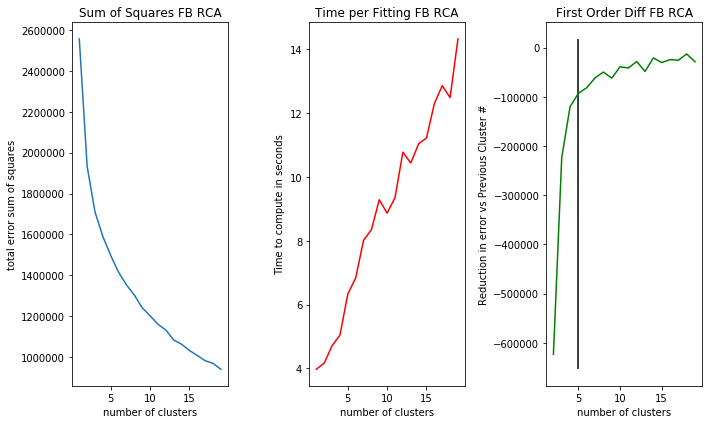

In [530]:
plot_grid_kmeans(ess_fb_rpa,time_fb_rpa,k_numbs, x_vline=5,title1='Sum of Squares FB RCA', title2 = 'Time per Fitting FB RCA', title3= 'First Order Diff FB RCA',figsize=(10,6))

## Facebook Best K-means - RCA
 - Looking at our clusters, it appears we have a gaussian on top of a gaussian. 
 - This doesn’t surprise us as our data projection is gaussian. The underlying package we used, is putting it in a gaussian space. 
 - The 5 clusters which we deemed as optimal by the elbow method show data points on top of each other. 
 - There is one outlier to us which is baffling but could be the result of randomness. We tried 20 restarts to get rid of this but that didn’t suffice.


In [531]:
# Variables
n_clusters =5

# KMeans
kmeans_fb_rpa_best = KMeans(n_clusters = n_clusters,n_jobs = -1,n_init = 20,max_iter = 400)
kmeans_fb_rpa_best.fit(fb_X_rand_proj)

# Grab the Centers and labels
kmeans_fb_rpa_cent = kmeans_fb_rpa_best.cluster_centers_

Text(0.5,1,'FB Dataset with 5 Clusters RCA Transformation')

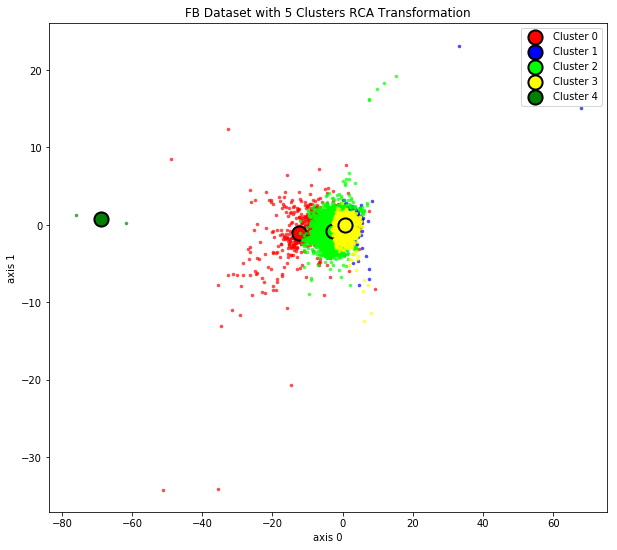

In [532]:
colors = ['#FF0000','#0000FF','#00ff00','#ffff00','#008000','#00fff9' ,'#800080','#FFA500','#16e739','#ff00f4','#FFFF00', '#000000' ,'#FFD700','#808000','#b266b2','#a0bfbf','#26619c','#26619c','#5bc0de']
labels = kmeans_fb_rpa_best.labels_
col_map=dict(zip(set(labels),colors))
label_color = [col_map[l] for l in labels]
col1 = 0
col2 = 1


plt.figure(figsize = (10,9))
for i in range(n_clusters):
    plt.scatter(fb_X_rand_proj[labels==i, col1],fb_X_rand_proj[labels==i, col2],marker='.', s=50, lw=0, alpha=.7, color = colors[i],edgecolor='k')
    plt.scatter(kmeans_fb_rpa_cent[i, col1], kmeans_fb_rpa_cent[i, col2], c=colors[i], marker='o',alpha=1, s=200, edgecolor='k', linewidths=2, label = f'Cluster {i}')
    plt.xlabel(f'axis {col1}')
    plt.ylabel(f'axis {col2}')
    plt.legend(loc='best')

plt.title(f'FB Dataset with {n_clusters} Clusters RCA Transformation' )

### Homogenity scores

- this is used later on in the report

In [605]:
fb_tel_scaled_labels = kmeans_fb_rpa_best.labels_
fb_sil_score_samp = []

fb_homo_scores.append(homogeneity_score(y_fb,fb_tel_scaled_labels))
# have to do a sample or computer will crash due to memory explosion
for i in range(0,500):
    fb_sil_score_samp.append(silhouette_score(fb_X_rand_proj,fb_tel_scaled_labels , metric='euclidean', sample_size=2000))
fb_sil_score.append(np.mean(fb_sil_score_samp))
fb_homo_text.append('kmeans RCA')

## Comparing and Contrasting K-Means so far for Facebook Data

- When we compare charts 1b, 2b, 3b, 4b, & 5b we see similarities and differences between Feature selection, PCA, ICA and RP. 1b(all scaled features, 2b(feature selection),  3b(PCA ) & 5b cluster similar. 
- It’s finding the data densities and centering the clusters over them. 4b(ICA) seems to do ok. 
- It can pick up on some unique groupings but then we see it get stuck, as clusters are in the middle of our separation. 
- We see that across different transformations we are getting different clusters and cluster numbers, except for 1b & 2b which are returning similar cluster types and numbers. 
- This shouldn’t surprise us give our data is in the same space just with a few less features. 
- The other feature transformation being performed are giving different clusters as it’s putting our data in a different feature projection space.


# Facebook Expectation Maximization - All Features Scaled

#### Grid Search Results 
- To select our k in expectation maximization we performed a grid search between 1 and 12 k and over 4 different types of covariances spherical, tied, diagonal and full. 
- We looked at the AIC & BIC values of each covariance type and plotted against cluster number. 
- We are looking for the “elbow” with the lowest AIC/BIC score. 
- This returned an optimal value of 4 with full covariance matrix. 
- We need to be cognizant of time as different covariance matrix take longer than others. In this case, it did take at least 5 seconds longer for our optimal value vs the others at our optimal value but our better aic/bic scores warrant the extra time.

In [539]:
n_components_range = range(1, 12)
cv_types = ['spherical', 'tied', 'diag', 'full']
aic_fb_all, bic_fb_all, gmm, time_fb_all = gmm_models(fb_x_scale, cv_types=cv_types, n_components = n_components_range, n_init=1)

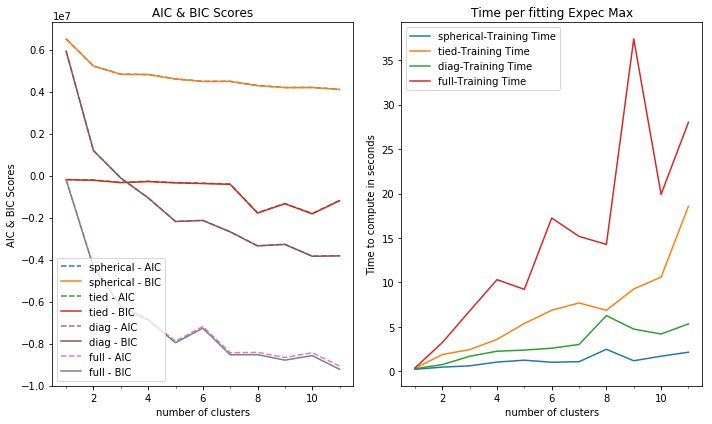

In [546]:
plot_gmm_grid(aic_fb_all, bic_fb_all,time_fb_all, cv_types, list(n_components_range), figsize = (10,6))

## Facebook Best Expectation-Maximization Full Dataset

- Looking at the clusters we got back we are seeing similar results to what k-means returned. 
- Data points close and to the origin are two different cluster whereas datapoints which are more spread out are other clusters. 
- We are seeing similar results between k-means and expectation maximization here. 
- The only difference are the clusters are more towards the origin of the graph due to the higher densities of data points. These densities will have a greater effect of pulling the clusters centers towards it.

In [617]:
n_clusters = 4
gmm_best_fb = GaussianMixture(n_components=n_clusters,
                                      covariance_type='full', n_init=1)
gmm_fb_fulllabels = gmm_best_fb.fit(fb_x_scale).predict(fb_x_scale)
means = gmm_best_fb.means_

Text(0.5,1,'FB Dataset with 4 Clusters \n All Featuers Scaled')

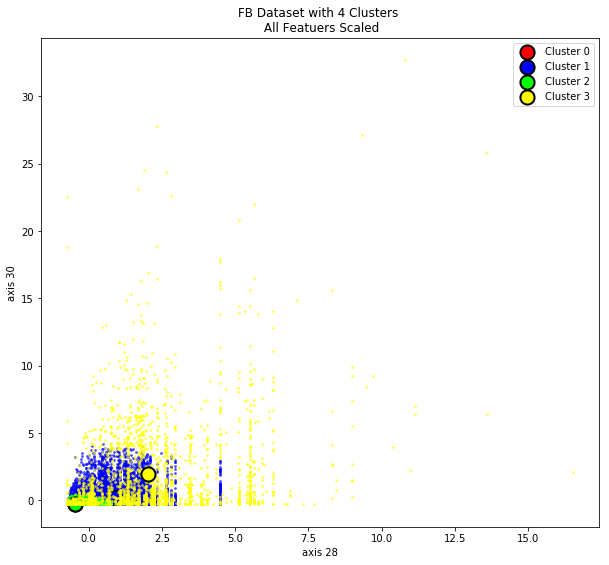

In [618]:
colors = ['#FF0000','#0000FF','#00ff00','#ffff00','#008000','#00fff9' ,'#800080','#FFA500','#16e739','#ff00f4','#FFFF00', '#000000' ,'#FFD700','#808000','#b266b2']
col_map=dict(zip(set(gmm_fb_fulllabels),colors))
label_color = [col_map[l] for l in gmm_fb_fulllabels]
col1 = 28
col2 = 30

plt.figure(figsize = (10,9))
for i in range(n_clusters):
    plt.scatter(fb_x_scale[gmm_fb_fulllabels==i, col1],fb_x_scale[gmm_fb_fulllabels==i, col2],marker='.', s=30, lw=0, alpha=0.7, color = colors[i],edgecolor='k')
    plt.scatter(means[i, col1], means[i, col2], c=colors[i], marker='o',alpha=1, s=200, edgecolor='k', linewidths=2, label = f'Cluster {i}')
    plt.xlabel(f'axis {col1}')
    plt.ylabel(f'axis {col2}')
    plt.legend(loc='best')

plt.title(f'FB Dataset with {n_clusters} Clusters \n All Featuers Scaled' )

### Homogenity scores

- this is used later on in the report

In [606]:
fb_sil_score_samp = []

fb_homo_scores.append(homogeneity_score(y_fb,gmm_fb_fulllabels))

# have to do a sample or computer will crash due to memory explosion
for i in range(0,500):
    fb_sil_score_samp.append(silhouette_score(fb_x_scale,gmm_fb_fulllabels , metric='euclidean', sample_size=2000))
fb_sil_score.append(np.mean(fb_sil_score_samp))

fb_homo_text.append('ExecMax Scale')

# Facebook Expectation Maximization - Feat Selection

#### Grid Search Results 
- To select our k in expectation maximization we performed a grid search between 1 and 12 k and over 4 different types of covariances spherical, tied, diagonal and full. 
- We looked at the AIC & BIC values of each covariance type and plotted against cluster number. 
- We are looking for the “elbow” with the lowest AIC/BIC score. 
- This returned an optimal value of 4 with full covariance matrix. We need to be cognizant of time as different covariance matrix take longer than others. 
- In this case, it did take at least 5 seconds longer for our optimal value vs the others at our optimal value but our better aic/bic scores warrant the extra time.

In [548]:
n_components_range = range(1, 12)
cv_types = ['spherical', 'tied', 'diag', 'full']
aic_fb_featimp, bic_fb_featimp, gmm_fb_featimp,time_fb_featimp = gmm_models(fb_x_scale_featimp, cv_types=cv_types, n_components = n_components_range)

C:\Users\JOSH\Anaconda3\lib\site-packages\sklearn\mixture\base.py:237: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)
C:\Users\JOSH\Anaconda3\lib\site-packages\sklearn\mixture\base.py:237: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)


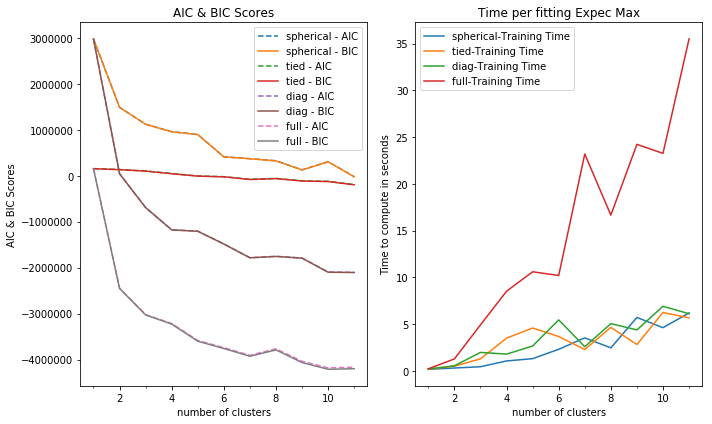

In [569]:
plot_gmm_grid(aic_fb_featimp, bic_fb_featimp,time_fb_featimp, cv_types, list(n_components_range), figsize = (10,6))

## Facebook Best Expec-Max from Feature Selection
- Looking at the clusters we got back are very similar to what K-means returned.
- The closer the data is towards x-axis the more compact our clusters. 
- The only small difference is our clusters are closer to 0 in the axis8 space vs kmeans. 
- I think we got the cluster we did because the edges have more data towards them, so expectation maximization is having a larger pull towards the axis8 than K-means. 

In [570]:
n_clusters = 4
gmm_best_fb_featimp = GaussianMixture(n_components=n_clusters,
                                      covariance_type='full', n_init = 5)
gmm_best_fb_featimp_labels = gmm_best_fb_featimp.fit(fb_x_scale_featimp).predict(fb_x_scale_featimp)
means = gmm_best_fb_featimp.means_

Text(0.5,1,'FB Dataset with 4 Clusters \n Feature Selection')

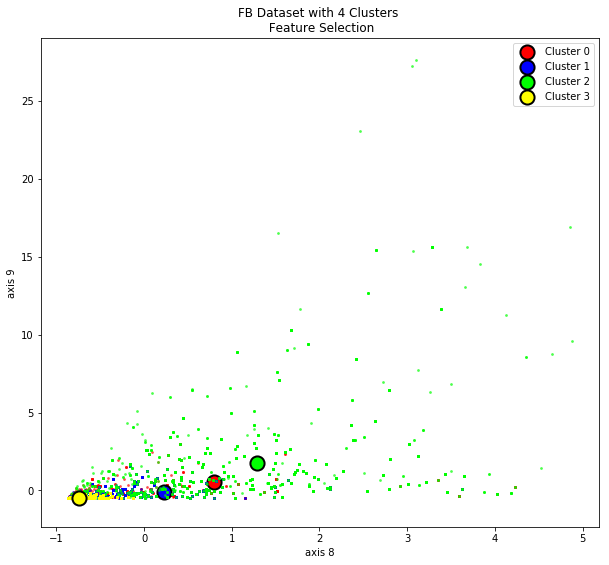

In [571]:
colors = ['#FF0000','#0000FF','#00ff00','#ffff00','#008000','#00fff9' ,'#800080','#FFA500','#16e739','#ff00f4','#FFFF00', '#000000' ,'#FFD700','#808000','#b266b2']
col_map=dict(zip(set(gmm_best_fb_featimp_labels),colors))
label_color = [col_map[l] for l in gmm_best_fb_featimp_labels]
col1 = 8
col2 = 9

plt.figure(figsize = (10,9))
for i in range(n_clusters):
    plt.scatter(fb_x_scale_featimp[gmm_best_fb_featimp_labels==i, col1],fb_x_scale_featimp[gmm_best_fb_featimp_labels==i, col2],marker='.', s=30, lw=0, alpha=0.7, color = colors[i],edgecolor='k')
    plt.scatter(means[i, col1], means[i, col2], c=colors[i], marker='o',alpha=1, s=200, edgecolor='k', linewidths=2, label = f'Cluster {i}')
    plt.xlabel(f'axis {col1}')
    plt.ylabel(f'axis {col2}')
    plt.legend(loc='best')

plt.title(f'FB Dataset with {n_clusters} Clusters \n Feature Selection' )

### Homogenity scores

- this is used later on in the report

In [607]:
fb_sil_score_samp = []

fb_homo_scores.append(homogeneity_score(y_fb,gmm_best_fb_featimp_labels))

# have to do a sample or computer will crash due to memory explosion
for i in range(0,500):
    fb_sil_score_samp.append(silhouette_score(fb_x_scale_featimp,gmm_best_fb_featimp_labels , metric='euclidean', sample_size=2000))
fb_sil_score.append(np.mean(fb_sil_score_samp))

fb_homo_text.append('ExecMax FeatImpor')

# Facebook Expectation-Maximization PCA

#### Grid Search Results 

 - To select our k in expectation maximization we performed a grid search between 1 and 12 k and over 4 different types of covariances spherical, tied, diagonal and full. 
 - We looked at the AIC & BIC values of each covariance type against plotted against cluster number. 
 - We are looking for the “elbow” with the lowest AIC/BIC score. 
 - This returned an optimal value of 6 with full covariance matrix. We need to be cognizant of time as different covariance matrix take longer than others. 
 - In this case, the fit times at our optimal value were relatively comparable therefore picking full covariance matrix makes sense as aic/bic values are lowest

In [550]:
n_components_range = range(1, 12)
cv_types = ['spherical', 'tied', 'diag', 'full']
aic_fb_pca, bic_fb_pca, gmm_fb_pca, time_fb_pca = gmm_models(fb_X_pca, cv_types=cv_types, n_components = n_components_range)

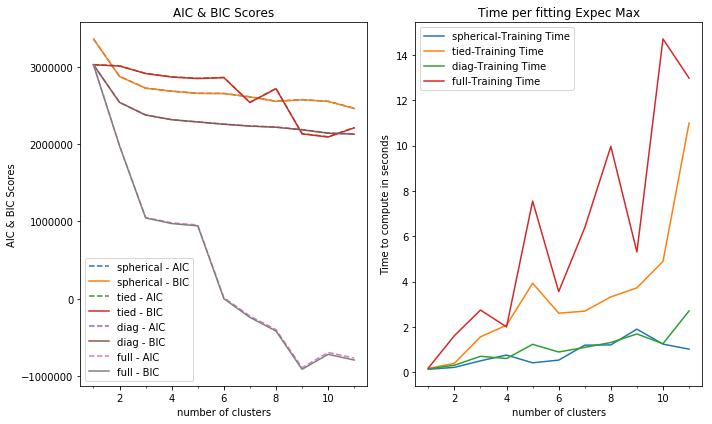

In [551]:
plot_gmm_grid(aic_fb_pca, bic_fb_pca,time_fb_pca, cv_types, list(n_components_range), figsize = (10,6))

## Facebook Best Expec-Max from PCA

 - Visually, the plots look similar vs k-means. 
 - The plotting difference is the clusters are closer to our origin vs k-means. 
 - The number of clusters between expec max and k-means are different. 
 - Expec max returned 6 clusters while k-means only had 4. 
 - While the clustering displayed visually might be similar, underneath expec max is telling us that the addition of two clusters is warranted because the data within those clusters are different than if we combined them with other clusters. 
 - The types of cluster we are getting isn’t surprising as some of these clusters are rectangular which makes sense given the orthogonal assumptions of PCA.

In [579]:
n_clusters = 6
gmm_best_fb_pca = GaussianMixture(n_components=n_clusters,
                                      covariance_type='full', n_init = 5)
gmm_best_fb_pca_labels = gmm_best_fb_pca.fit(fb_X_pca).predict(fb_X_pca)
means = gmm_best_fb_pca.means_

Text(0.5,1,'FB Dataset with 6 Clusters \n PCA Transformed')

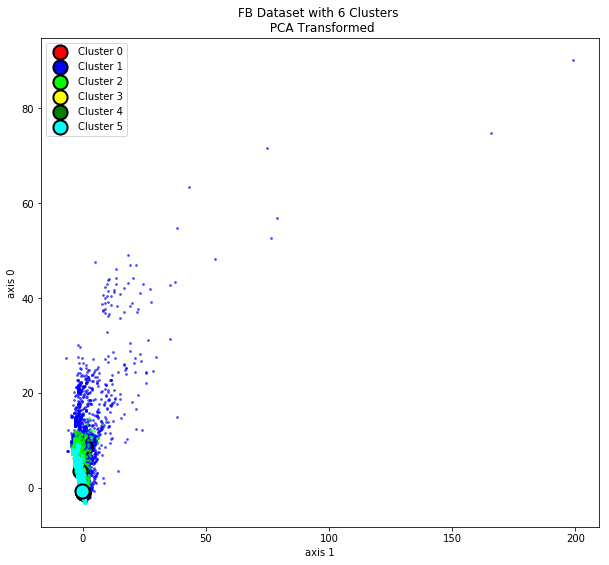

In [580]:

colors = ['#FF0000','#0000FF','#00ff00','#ffff00','#008000','#00fff9' ,'#800080','#FFA500','#16e739','#ff00f4','#FFFF00', '#000000' ,'#FFD700','#808000','#b266b2']
col_map=dict(zip(set(gmm_best_fb_pca_labels),colors))
label_color = [col_map[l] for l in gmm_best_fb_pca_labels]
col1 = 1
col2 = 0

plt.figure(figsize = (10,9))
for i in range(n_clusters):
    plt.scatter(fb_X_pca[gmm_best_fb_pca_labels==i, col1],fb_X_pca[gmm_best_fb_pca_labels==i, col2],marker='.', s=30, lw=0, alpha=0.7, color = colors[i],edgecolor='k')
    plt.scatter(means[i, col1], means[i, col2], c=colors[i], marker='o',alpha=1, s=200, edgecolor='k', linewidths=2, label = f'Cluster {i}')
    plt.xlabel(f'axis {col1}')
    plt.ylabel(f'axis {col2}')
    plt.legend(loc='best')

plt.title(f'FB Dataset with {n_clusters} Clusters \n PCA Transformed' )

### Homogenity Scores for Expec Max PCA

- This is used later in the report

In [608]:
fb_sil_score_samp = []

fb_homo_scores.append(homogeneity_score(y_fb,gmm_best_fb_pca_labels))

# have to do a sample or computer will crash due to memory explosion
for i in range(0,500):
    fb_sil_score_samp.append(silhouette_score(fb_X_pca,gmm_best_fb_pca_labels , metric='euclidean', sample_size=2000))
fb_sil_score.append(np.mean(fb_sil_score_samp))

fb_homo_text.append('ExecMax PCA')

# Facebook Expectation-Maximization ICA

#### Grid Search Results 

 - To select our k in expectation maximization we performed a grid search between 1 and 12 k and over 4 different types of covariances spherical, tied, diagonal and full. 
 - We looked at the AIC & BIC values of each covariance type against plotted against cluster number. 
 - We are looking for the “elbow” with the lowest AIC/BIC score. 
 - This returned an optimal value of 7 with full covariance matrix. We need to be cognizant of time as different covariance matrix taking longer than others. In this case, the fit times for our choosing was fairly quick, <5 seconds. 

In [583]:
n_components_range = range(1, 12)
cv_types = ['spherical', 'tied', 'diag', 'full']
aic_fb_ica, bic_fb_ica, gmm_fb_ica, time_fb_ica = gmm_models(fb_X_ica , cv_types=cv_types, n_components = n_components_range)

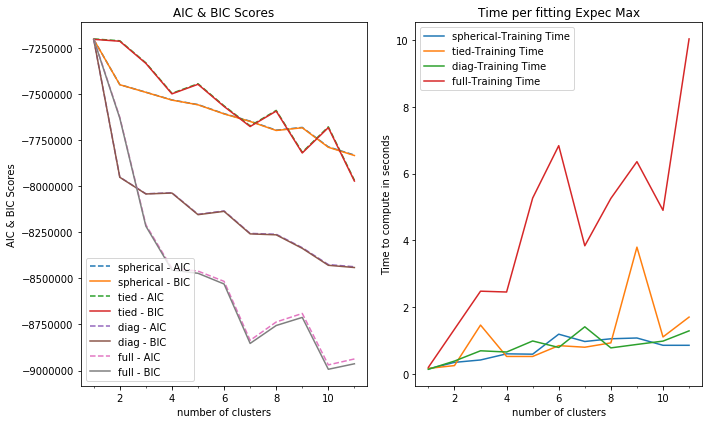

In [584]:
plot_gmm_grid(aic_fb_ica, bic_fb_ica,time_fb_ica, cv_types, list(n_components_range), figsize = (10,6))

## Facebook Best Expec-Max from ICA
 - Since ICA is about independence, we can see how this transformation projects our data. 
 - ICA has taken our data and given us 2 distinct separations. 
   - Within these separations we can see groupings of data. Given that ICA is about independence between features, it’s no surprise why our data is featured this way and why we are getting the types of groupings within our data. While one would think all these groupings should be their own cluster, and they should be, our clustering algo isn’t finding them. 
 - This is a downside of having these groupings that are independent and spread out, it makes it harder to find optimal clusters. 
 - The reason being k-means & expec max can get stuck and stick multiple groups together when it should be its own group. 
 - This is not only what we saw with k-means but also what we see with expec max. 
 - We employed 10 random restarts to help with this, but we can see our clusters are stuck in the middle of the separation. While the optimal clusters are different the results are similar. Both have a hard time finding the independent groupings.

In [590]:
n_clusters = 7
gmm_best_fb_ica = GaussianMixture(n_components=n_clusters,
                                      covariance_type='full',n_init=10)
gmm_best_fb_ica_labels = gmm_best_fb_ica.fit(fb_X_ica).predict(fb_X_ica)
means = gmm_best_fb_ica.means_

Text(0.5,1,'FB Dataset with 7 Clusters \n ICA Transformation')

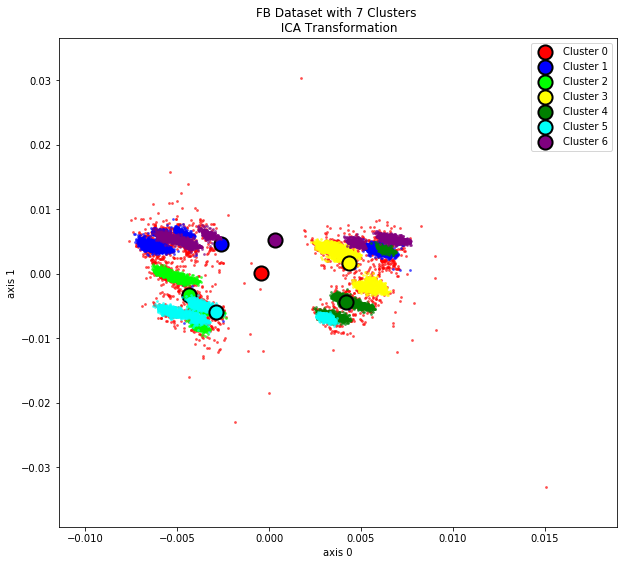

In [591]:
colors = ['#FF0000','#0000FF','#00ff00','#ffff00','#008000','#00fff9' ,'#800080','#FFA500','#16e739','#ff00f4','#FFFF00', '#000000' ,'#FFD700','#808000','#b266b2']
col_map=dict(zip(set(gmm_best_fb_ica_labels),colors))
label_color = [col_map[l] for l in gmm_best_fb_ica_labels]
col1 = 0
col2 = 1

plt.figure(figsize = (10,9))
for i in range(n_clusters):
    plt.scatter(fb_X_ica[gmm_best_fb_ica_labels==i, col1],fb_X_ica[gmm_best_fb_ica_labels==i, col2],marker='.', s=30, lw=0, alpha=0.7, color = colors[i],edgecolor='k')
    plt.scatter(means[i, col1], means[i, col2], c=colors[i], marker='o',alpha=1, s=200, edgecolor='k', linewidths=2, label = f'Cluster {i}')
    plt.xlabel(f'axis {col1}')
    plt.ylabel(f'axis {col2}')
    plt.legend(loc='best')

plt.title(f'FB Dataset with {n_clusters} Clusters \n ICA Transformation' )

### Homogenity Scores for Expec Max ICA

 - This is stored for later use in the homework

In [609]:
fb_sil_score_samp = []

fb_homo_scores.append(homogeneity_score(y_fb,gmm_best_fb_ica_labels))

# have to do a sample or computer will crash due to memory explosion
for i in range(0,500):
    fb_sil_score_samp.append(silhouette_score(fb_X_ica,gmm_best_fb_ica_labels , metric='euclidean', sample_size=2000))
fb_sil_score.append(np.mean(fb_sil_score_samp))

fb_homo_text.append('ExecMax ICA')

# Facebook Expectation-Maximization RCA

#### Grid Search Results 

 - To select our k in expectation maximization we performed a grid search between 1 and 12 k and over 4 different types of covariances spherical, tied, diagonal and full. 
 - We looked at the AIC & BIC values of each covariance type against plotted against cluster number. 
 - We are looking for the “elbow” with the lowest AIC/BIC score. 
 - This returned an optimal value of 5 with full covariance matrix. We need to be cognizant of time as different covariance matrix taking longer than others. In this case, the fit times for our choosing our optimal values was quick, < 7 seconds. 

In [554]:
n_components_range = range(1, 12)
cv_types = ['spherical', 'tied', 'diag', 'full']
aic_fb_rca, bic_fb_rca, gmm_fb_rca, time_fb_rca = gmm_models(fb_X_rand_proj, cv_types=cv_types, n_components = n_components_range)

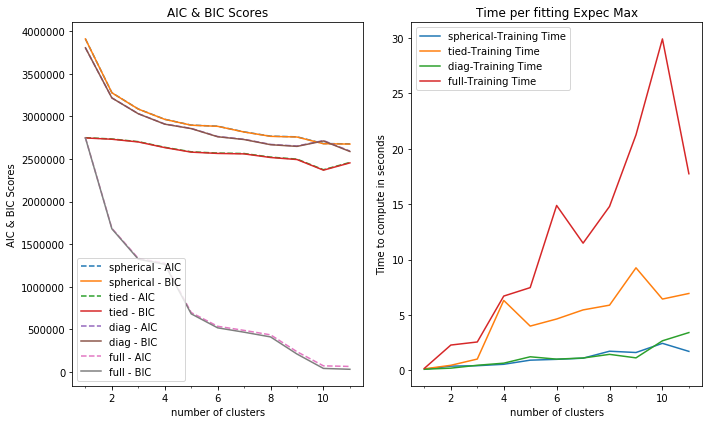

In [555]:
plot_gmm_grid(aic_fb_rca, bic_fb_rca,time_fb_rca, cv_types, list(n_components_range), figsize = (10,6))

## Telco Best Expec-Max from RCA
 - The number of clusters we are returning is very similar to what k-means returned. 
 - The location of our cluster centers between k-means and expec max for RP are very similar. 
 - This should not be surprising as our random projection and expectation maximization both are using a gaussian process underneath to project and cluster so it’s not surprising that both algorithms are picking up the similar things. 
 - There is one clustering difference between k-means and expec max, k-means has one outlier cluster while expec max doesn’t have any, they are all stacked on top of each other.
 - The type of clusters returned appear to be grouped with each other and on top of each other.

In [593]:
n_clusters = 5
gmm_best_fb_rca = GaussianMixture(n_components=n_clusters,
                                      covariance_type='full',n_init=10)
gmm_best_fb_rca_labels = gmm_best_fb_rca.fit(fb_X_rand_proj).predict(fb_X_rand_proj)
means = gmm_best_fb_rca.means_

Text(0.5,1,'FB Dataset with 5 Clusters \n RCA Transformation')

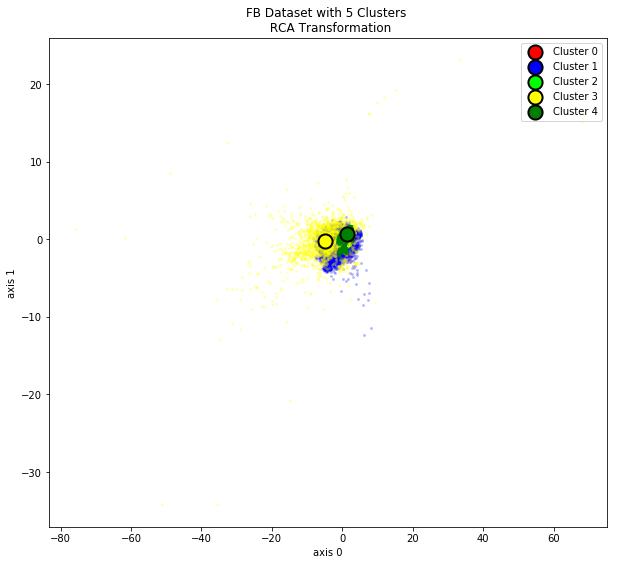

In [594]:
#for i in range(0, fb_X_rand_proj.shape[1]-1):
colors = ['#FF0000','#0000FF','#00ff00','#ffff00','#008000','#00fff9' ,'#800080','#FFA500','#16e739','#ff00f4','#FFFF00', '#000000' ,'#FFD700','#808000','#b266b2']
col_map=dict(zip(set(gmm_best_fb_rca_labels),colors))
label_color = [col_map[l] for l in gmm_best_fb_rca_labels]
col1 = 0
col2 = 1

plt.figure(figsize = (10,9))
for i in range(n_clusters):
    plt.scatter(fb_X_rand_proj[gmm_best_fb_rca_labels==i, col1],fb_X_rand_proj[gmm_best_fb_rca_labels==i, col2],marker='.', s=30, lw=0, alpha=0.3, color = colors[i],edgecolor='k')
    plt.scatter(means[i, col1], means[i, col2], c=colors[i], marker='o',alpha=1, s=200, edgecolor='k', linewidths=2, label = f'Cluster {i}')
    plt.xlabel(f'axis {col1}')
    plt.ylabel(f'axis {col2}')
    plt.legend(loc='best')

plt.title(f'FB Dataset with {n_clusters} Clusters \n RCA Transformation' )

### Homogenity Scores for Expec Max RCA

 - This is used later on in the homework

In [610]:
fb_sil_score_samp = []

fb_homo_scores.append(homogeneity_score(y_fb,gmm_best_fb_rca_labels))

# have to do a sample or computer will crash due to memory explosion
for i in range(0,500):
    fb_sil_score_samp.append(silhouette_score(fb_X_rand_proj,gmm_best_fb_rca_labels , metric='euclidean', sample_size=2000))
fb_sil_score.append(np.mean(fb_sil_score_samp))

fb_homo_text.append('ExecMax RCA')

# Comparison of Clusters for Telco Dataset

## Homogenity Scores

 - When comparing all of these feature transformations and cluster algorithms we want to see how they line up with our class labels and how compact the cluster are. 
 - In order to do this, we employed homogeneity score and a silhouette score.  A cluster is homogenous if all class labels in the cluster are the same. We want our score to be as high as possible. 
 - Here the two best dimensionality reductions are feature selection and scaling all our data using clustering via expectation maximization. 
 - Its really not surprise that within each clustering algorithm, k-means & expec max, we see feature selection as the highest. We used a greedy algorithm, decision tree, to split our data based on the class labels. We also see the benefits of the probabilistic nature of expectation maximization here with our feature selection as it’s assigning groups based of the mean value of the cluster and the probability that it belongs in that cluster, whereas-means is finding the average of all points in that cluster. 
 - It doesn’t surprise us that ICA is the worst performing clustering technique with respect to homogeneity as both clustering algorithms had a difficult time picking up the independent clusters.

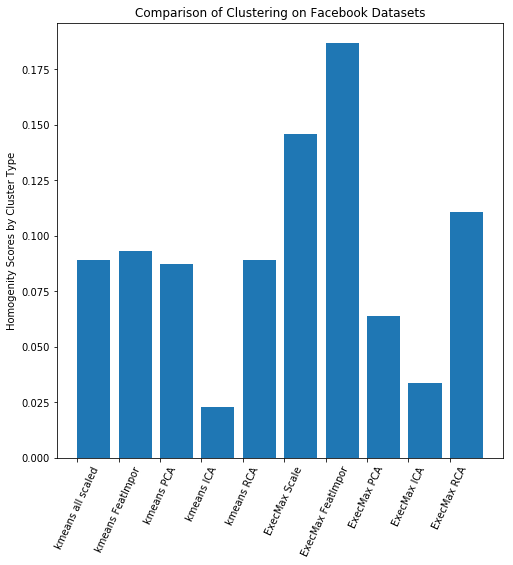

In [611]:
plt.figure(figsize = (8,8))
y_pos = np.arange(len(fb_homo_text))
plt.bar(y_pos,fb_homo_scores, align='edge')
plt.xticks(y_pos, fb_homo_text,rotation = 65)
plt.ylabel('Homogenity Scores by Cluster Type')
plt.title('Comparison of Clustering on Facebook Datasets')
plt.show()

## Comparison of Clustering Compactness

### Silhouette Scores
- We also need to see the compactness of our clusters.  We used a measure called Silhouette score to tell us this. 
- Silhouette score tells us how similar an object is to its own cluster compared to other clusters. 
- Values close to 1 represent values identified well for its cluster where as a value of -1 would say its poorly matched and it belongs in a different cluster. 
- All clustering algorithms have a value 0 which indicate that our clusters are not overlapping or are relatively compact
- We see feature importance, PCA and all scaled variables using k-means clustering algorithm are producing the best clusters based on silhouette score.  
- This tells us we are producing good clusters which are appearing to line up naturally.
- While they may be middle of the road in terms of homogeneity, they are producing clusters which are most similar. 

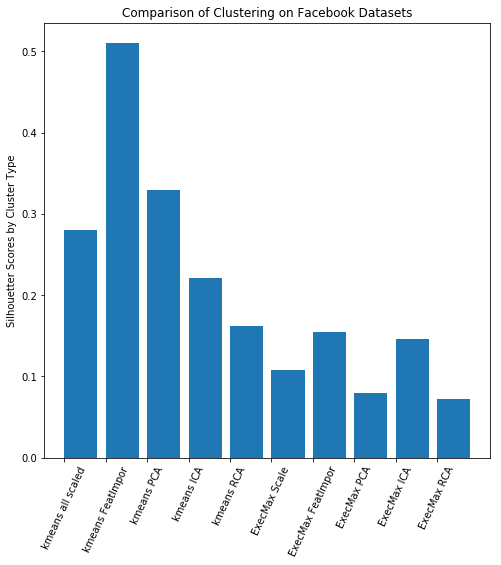

In [612]:
plt.figure(figsize = (8,8))
y_pos = np.arange(len(fb_homo_text))
plt.bar(y_pos,fb_sil_score, align='edge')
plt.xticks(y_pos, fb_homo_text,rotation = 65)
plt.ylabel('Silhouetter Scores by Cluster Type')
plt.title('Comparison of Clustering on Facebook Datasets')
plt.show()


# Run your neural network learner from assignment 3 on the data after dimensionality reduction (from task 2). Explain and plot your observations (error rates, etc.) 

 - Looking at the ROC/ACU curves the following are showing a similar AUC score of 90%,all features scaled (fb_all), feature selection (fb_feat_imp, PCA, ICA & RCA. 
 - Our results form homework 3 follow these at 88% and last is the labels only which see a roc/auc score of 65%.  

C:\Users\JOSH\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\JOSH\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\JOSH\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


fb_all had an auc score of 0.9009
fb_feat_imp had an auc score of 0.91
fb_PCA had an auc score of 0.899
fb_ICA had an auc score of 0.8951
fb_RCA had an auc score of 0.8975
homework 3 had an auc score of 0.8835
labels only had an auc score of 0.649


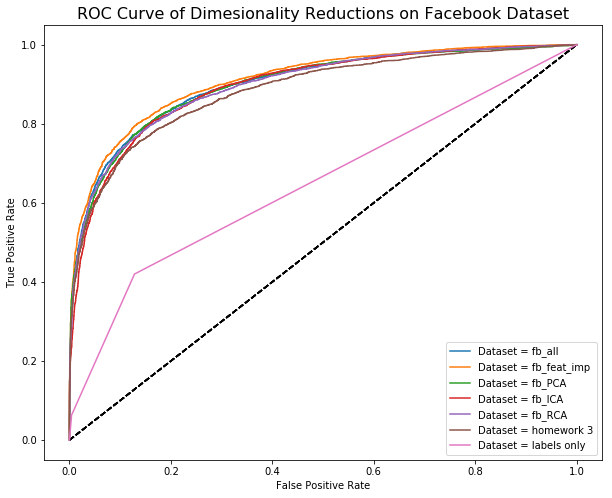

total time to complete 381.98597240448


In [613]:
####################################################################################################################################
#
# This is what we did for hwk3
# Top 7 correlated features
#
####################################################################################################################################

# top 7 features
top_n = ['num_comm_diff_24_48','num_comm_l24','h_hours','pst_shre_cnt','page_talk_bt','num_comm_l24_sq','page_talk_l24']
X_fb_top = final_df2.loc[:,top_n].values
y_fb_top = final_df2.loc[:,'comm_h_hour_bin'].values

# Top correlated features
fb_topn_x_train_all, fb_topn_x_test_all, fb_topn_y_train_all, fb_topn_y_test_all = train_test_split(X_fb_top, y_fb_top, test_size = .20, shuffle=True)

# Scale the top features
topn_xscaler = StandardScaler().fit(fb_topn_x_train_all)
fb_topn_train_sc = topn_xscaler.transform(fb_topn_x_train_all)
fb_topn_test_sc = topn_xscaler.transform(fb_topn_x_test_all)

####################################################################################################################################
#
# This is for labels only
#
####################################################################################################################################

fb_labels_nn = kmeans_fb.labels_
fb_X_train_nn, fb_X_test_nn, y_fb_train_nn, y_fb_test_nn = train_test_split(fb_labels_nn, y_fb, test_size = .20, shuffle = True)
fb_X_train_nn = fb_X_train_nn[:,np.newaxis]
fb_X_test_nn = fb_X_test_nn[:,np.newaxis]

####################################################################################################################################
#
# Homework 3 Final Parameters
#
####################################################################################################################################

fb_datasets = {'fb_all': fb_x_scale,'fb_feat_imp':fb_x_scale_featimp, 'fb_PCA':fb_X_pca,  'fb_ICA':fb_X_ica,  'fb_RCA':fb_X_rand_proj, 'homework 3':1, 'labels only':1}
activation = 'relu'
layers = 2
starting_node = 120
epoch = 150

####################################################################################################################################
#
# ROC/AUC Curve
#
####################################################################################################################################

plt.figure(figsize = (10,8))
fb_nn_start_time = time()
for key, dataset in fb_datasets.items():
    if key == 'homework 3':
        _,  pred, pred_prob = layers_exp(layers, starting_node, fb_topn_train_sc, fb_topn_y_train_all, fb_topn_test_sc, fb_topn_y_test_all,
                                            activation = activation, epochs = epoch, batch_size = 1000,verbose=0,class_pred=True)
        fpr, tpr, _ = roc_curve(fb_topn_y_test_all, pred_prob)
        auc_score = roc_auc_score(fb_topn_y_test_all, pred_prob)
        print(f'{key} had an auc score of {np.round(auc_score, decimals = 4)}')
    # split the data
    elif key == 'labels only':
        _,  pred, pred_prob = layers_exp(layers,starting_node,fb_X_train_nn, y_fb_train_nn, fb_X_test_nn, y_fb_test_nn
                                         , activation = activation, epochs = epoch, batch_size = 400,verbose=0, class_pred=True)
        fpr, tpr, _ = roc_curve(y_fb_test_nn, pred_prob)
        auc_score = roc_auc_score(y_fb_test_nn, pred_prob)
        print(f'{key} had an auc score of {np.round(auc_score, decimals = 4)}')
    else:
        x_train, x_test, y_train, y_test = train_test_split(dataset, y_fb, test_size = .20, shuffle = True)
        _,  pred, pred_prob = layers_exp(layers,starting_node,x_train, y_train, x_test, y_test,
                                         activation = activation, epochs = epoch, batch_size = 1000,verbose=0,class_pred=True)
        fpr, tpr, _ = roc_curve(y_test, pred_prob)
        auc_score = roc_auc_score(y_test, pred_prob)
        print(f'{key} had an auc score of {np.round(auc_score, decimals = 4)}')
    plt.title('ROC Curve of Dimesionality Reductions on Facebook Dataset', fontsize = 16)
    plt.plot([0,1],[0,1], 'k--')
    plt.plot(fpr, tpr, label = f'Dataset = {key}')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()

plt.show()
fb_nn_end_time = time()
print(f'total time to complete {fb_nn_end_time-fb_nn_start_time}')

# Neural Net Error Rates - Facebook

## Comparing and contrasting the error rates of the different dimesonalities

 - Looking at both Accuracy and Loss we see that all types of dimensionality reduction techniques are producing similar accuracy and loss results. 
 - The worst performing neural net is the labels only, which, is using the cluster labels as the inputs. 
 - Both ICA and labels only from task 1 had the highest loss and lowest accuracy. 
 - Also, all seem to take the same amount of time to run, 40-50 seconds. This variation can be explained by other things running simultaneously only my computer.

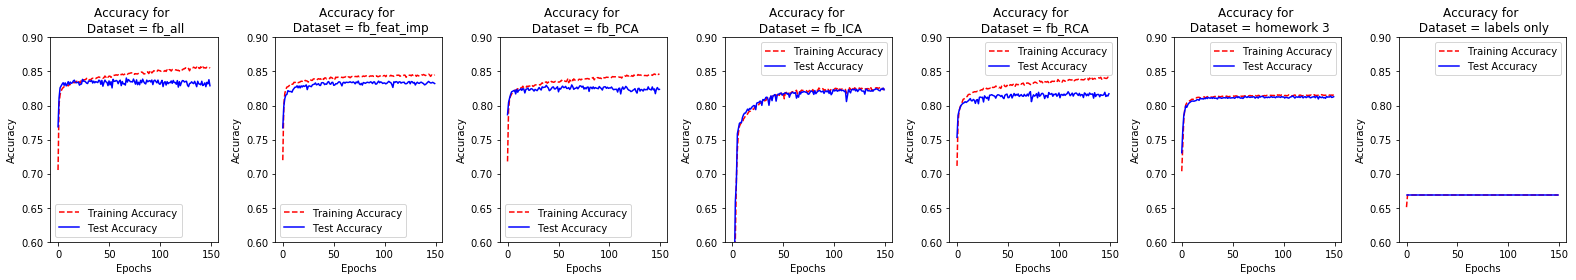

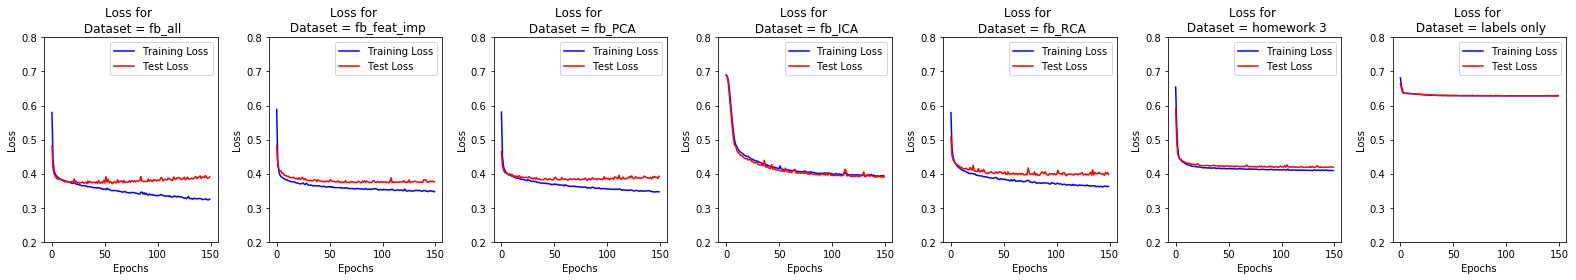

In [614]:
fb_datasets = {'fb_all': fb_x_scale,'fb_feat_imp':fb_x_scale_featimp, 'fb_PCA':fb_X_pca,  'fb_ICA':fb_X_ica,  'fb_RCA':fb_X_rand_proj, 'homework 3':1, 'labels only':1}
activation = 'relu'
layers = 2
starting_node = 120
epoch = 150

###################################################################################################
#
# This is for labels only
#
###################################################################################################
fb_labels_nn = kmeans_fb.labels_
fb_X_train_nn, fb_X_test_nn, y_fb_train_nn, y_fb_test_nn = train_test_split(fb_labels_nn, y_fb, test_size = .20, shuffle = True)
fb_X_train_nn = fb_X_train_nn[:,np.newaxis]
fb_X_test_nn = fb_X_test_nn[:,np.newaxis]


###################################################################################################
#
# Set up the plots
#
###################################################################################################

fig, axs = plt.subplots(nrows=1,ncols=len(fb_datasets), figsize=(22, 4), facecolor='w', edgecolor='k')
axs = axs.ravel()

figs, axes = plt.subplots(nrows=1,ncols=len(fb_datasets), figsize=(22, 4), facecolor='w', edgecolor='k')
axes = axes.ravel()


###################################################################################################
#
# Start Looping
#
###################################################################################################
subplot_numb = 0
train_time = []
for key, dataset in fb_datasets.items():
    if key == 'homework 3':
        start = time()
        history = layers_exp(layers,starting_node,fb_topn_train_sc, fb_topn_y_train_all, fb_topn_test_sc, fb_topn_y_test_all
                             , activation = activation, epochs = epoch, batch_size = 1000, verbose=0, class_pred=False)
        end = time()
        train_time.append(end-start)
    elif key == 'labels only':
        start = time()
        history = layers_exp(layers,starting_node,fb_X_train_nn, y_fb_train_nn, fb_X_test_nn, y_fb_test_nn
                             , activation = activation, epochs = epoch, batch_size = 1000, verbose=0, class_pred=False)
        end = time() 
        train_time.append(end-start)
    else:
        x_train, x_test, y_train, y_test = train_test_split(dataset, y_fb, test_size = .20, shuffle = True)
        start = time()
        history = layers_exp(layers,starting_node,x_train, y_train, x_test, y_test
                             , activation = activation, epochs = epoch, batch_size = 1000, verbose=0, class_pred=False)
        end = time()
        train_time.append(end-start)

    # Get training and test accuracy histories
    training_accuracy = history.history['acc']
    test_accuracy = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

        # Create count of the number of epochs
        #layer_count = range(1, len(layers_to_test)+1)
        #subplot_numb = i-1 + row
        #second_row = subplot_numb + len(layers_to_test)

    # Visualize accuracy history
    axs[subplot_numb].plot(training_accuracy, 'r--')
    axs[subplot_numb].plot(test_accuracy, 'b-')
    axs[subplot_numb].legend(['Training Accuracy', 'Test Accuracy'])
    axs[subplot_numb].set_title(f'Accuracy for \n Dataset = {key}')
    axs[subplot_numb].set_xlabel('Epochs')
    axs[subplot_numb].set_ylabel('Accuracy')
    axs[subplot_numb].set_ylim(0.6,.9)

    axes[subplot_numb].plot(loss, 'b-')
    axes[subplot_numb].plot(val_loss, 'r-')
    axes[subplot_numb].legend(['Training Loss', 'Test Loss'])
    axes[subplot_numb].set_title(f'Loss for \n Dataset = {key}')
    axes[subplot_numb].set_xlabel('Epochs')
    axes[subplot_numb].set_ylabel('Loss')
    axes[subplot_numb].set_ylim(0.2,.8)
       
    subplot_numb += 1
    
fig.tight_layout()
figs.tight_layout()

#### Comments

 - All of them take roughly the same time to run
 - some variation but mostly due to other processes running in background


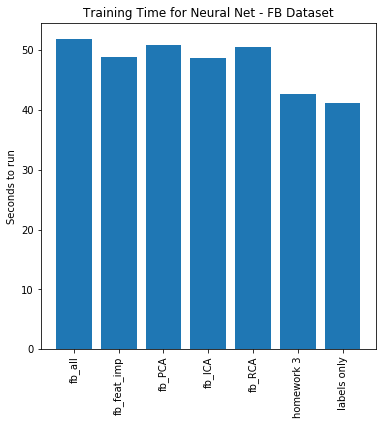

In [616]:
plt.figure(figsize = (6,6))
y_pos = np.arange(len(fb_datasets))
plt.bar(y_pos,train_time, align='center')
plt.xticks(y_pos, fb_datasets.keys(),rotation = 90)
plt.ylabel('Seconds to run')
plt.title('Training Time for Neural Net - FB Dataset')
plt.show()